## 1. Data Preparation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statistics as stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read train and test data
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

# concat train and test data
data = pd.concat([trainData, testData], sort=True).reset_index(drop=True)

print(f'Number of Training Examples = {trainData.shape[0]}')
print(f'Number of Test Examples = {testData.shape[0]}')
print(f'Data Shape = {data.shape}')

Number of Training Examples = 891
Number of Test Examples = 418
Data Shape = (1309, 12)


In [3]:
# see all data
data

Age Cabin Embarked      Fare  \
0     22.0   NaN        S    7.2500   
1     38.0   C85        C   71.2833   
2     26.0   NaN        S    7.9250   
3     35.0  C123        S   53.1000   
4     35.0   NaN        S    8.0500   
...    ...   ...      ...       ...   
1304   NaN   NaN        S    8.0500   
1305  39.0  C105        C  108.9000   
1306  38.5   NaN        S    7.2500   
1307   NaN   NaN        S    8.0500   
1308   NaN   NaN        C   22.3583   

                                                   Name  Parch  PassengerId  \
0                               Braund, Mr. Owen Harris      0            1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                                Heikkinen, Miss. Laina      0            3   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                              Allen, Mr. William Henry      0            5   
...                                                 ...    ...          ...   
1304                                 Spector, Mr. Woolf      0         1305   
1305                       Oliva y Ocana, Dona. Fermina      0         1306   
1306                       Saether, Mr. Simon Sivertsen      0         1307   
1307                                Ware, Mr. Frederick      0         1308   
1308                           Peter, Master. Michael J      1         1309   

      Pclass     Sex  SibSp  Survived              Ticket  
0          3    male      1       0.0           A/5 21171  
1          1  female      1       1.0            PC 17599  
2          3  female      0       1.0    STON/O2. 3101282  
3          1  female      1       1.0              113803  
4          3    male      0       0.0              373450  
...      ...     ...    ...       ...                 ...  
1304       3    male      0       NaN           A.5. 3236  
1305       1  female      0       NaN            PC 17758  
1306       3    male      0       NaN  SOTON/O.Q. 3101262  
1307       3    male      0       NaN              359309  
1308       3    male      1       NaN                2668  

[1309 rows x 12 columns]

In [4]:
#check duplicated data
data.duplicated().sum()

0

In [5]:
# check null data
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### 1.1 Fill Missing Values

#### 1.1.1 Age

In [6]:
# to fill missing values in Age we can check the correlation between features, in this case we can use median Age w.r.t Pclass 
data_all_corr = data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
data_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
data_all_corr[data_all_corr['Feature 1'] == 'Age']

Feature 1    Feature 2  Correlation Coefficient
0        Age          Age                 1.000000
9        Age       Pclass                 0.408106
18       Age        SibSp                 0.243699
21       Age         Fare                 0.178740
26       Age        Parch                 0.150917
30       Age     Survived                 0.077221
41       Age  PassengerId                 0.028814

In [7]:
# fill the null values in Age column
# fill the null values in numerical columns with average specific to certain columns
# fill in the missing data in the columns according to the Pclass and Sex median.
unique_Sex = pd.unique(data.Sex)
unique_Pclass = pd.unique(data.Pclass)

# find Age median in Pclass and Sex specific
filter_data = data[['Sex', 'Pclass', "Age"]].groupby(["Sex", "Pclass"]).median()['Age']

for i in unique_Pclass:
    for j in unique_Sex:
        print(f'Missing values in Age column fill with {filter_data[j][i]} when Pclass is {i} and Sex is {j}')

# Filling the missing values in Age with the medians of Sex and Pclass groups
data['Age'] = data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Missing values in Age column fill with 25.0 when Pclass is 3 and Sex is male
Missing values in Age column fill with 22.0 when Pclass is 3 and Sex is female
Missing values in Age column fill with 42.0 when Pclass is 1 and Sex is male
Missing values in Age column fill with 36.0 when Pclass is 1 and Sex is female
Missing values in Age column fill with 29.5 when Pclass is 2 and Sex is male
Missing values in Age column fill with 28.0 when Pclass is 2 and Sex is female


#### 1.1.2 Embarked

In [8]:
# see missing values in Embarked column
data[data['Embarked'].isnull()]

Age Cabin Embarked  Fare                                       Name  \
61   38.0   B28      NaN  80.0                        Icard, Miss. Amelie   
829  62.0   B28      NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)   

     Parch  PassengerId  Pclass     Sex  SibSp  Survived  Ticket  
61       0           62       1  female      0       1.0  113572  
829      0          830       1  female      0       1.0  113572

In [9]:
# fill missing values in Embarked with mode of Embarked column 
data['Embarked'] = data['Embarked'].fillna(stats.mode(data['Embarked']))
print(f"Missing values in Embarked column fill with {stats.mode(data['Embarked'])}")

Missing values in Embarked column fill with S


#### 1.1.3 Fare

In [10]:
# see missing values in Fare column
data[data['Fare'].isnull()]

Age Cabin Embarked  Fare                Name  Parch  PassengerId  \
1043  60.5   NaN        S   NaN  Storey, Mr. Thomas      0         1044   

      Pclass   Sex  SibSp  Survived Ticket  
1043       3  male      0       NaN   3701

In [11]:
# fill missing values in Fare with mean when Pclass=3, Parch=0, SibSp=0 
mean_fare = data.groupby(['Pclass', 'Parch', 'SibSp']).Fare.mean()[3][0][0]

# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
data['Fare'] = data['Fare'].fillna(mean_fare)
print(f"Missing values in Fare column fill with {mean_fare}")

Missing values in Fare column fill with 9.096707218683653


#### 1.1.4 Cabin

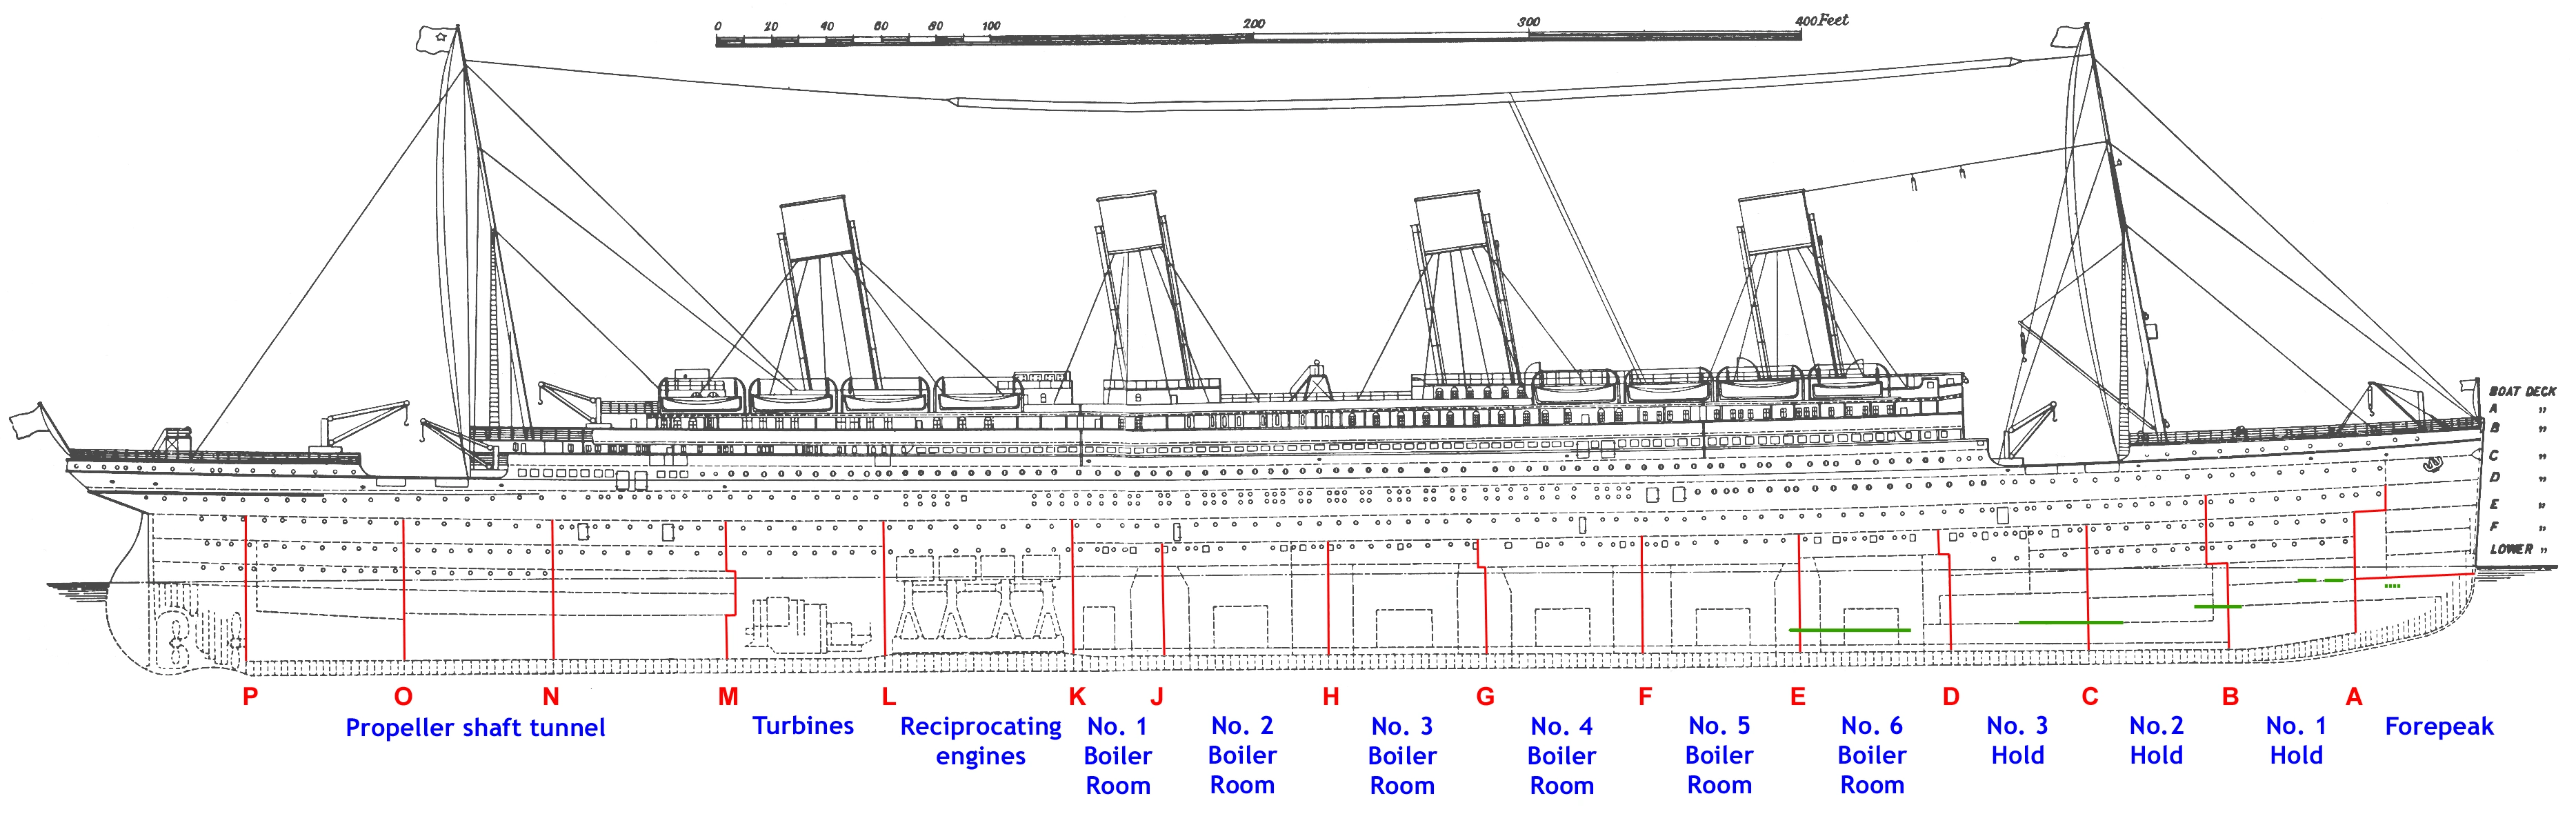

It turns out to be the first letter of the Cabin values are the decks in which the cabins are located.
Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.

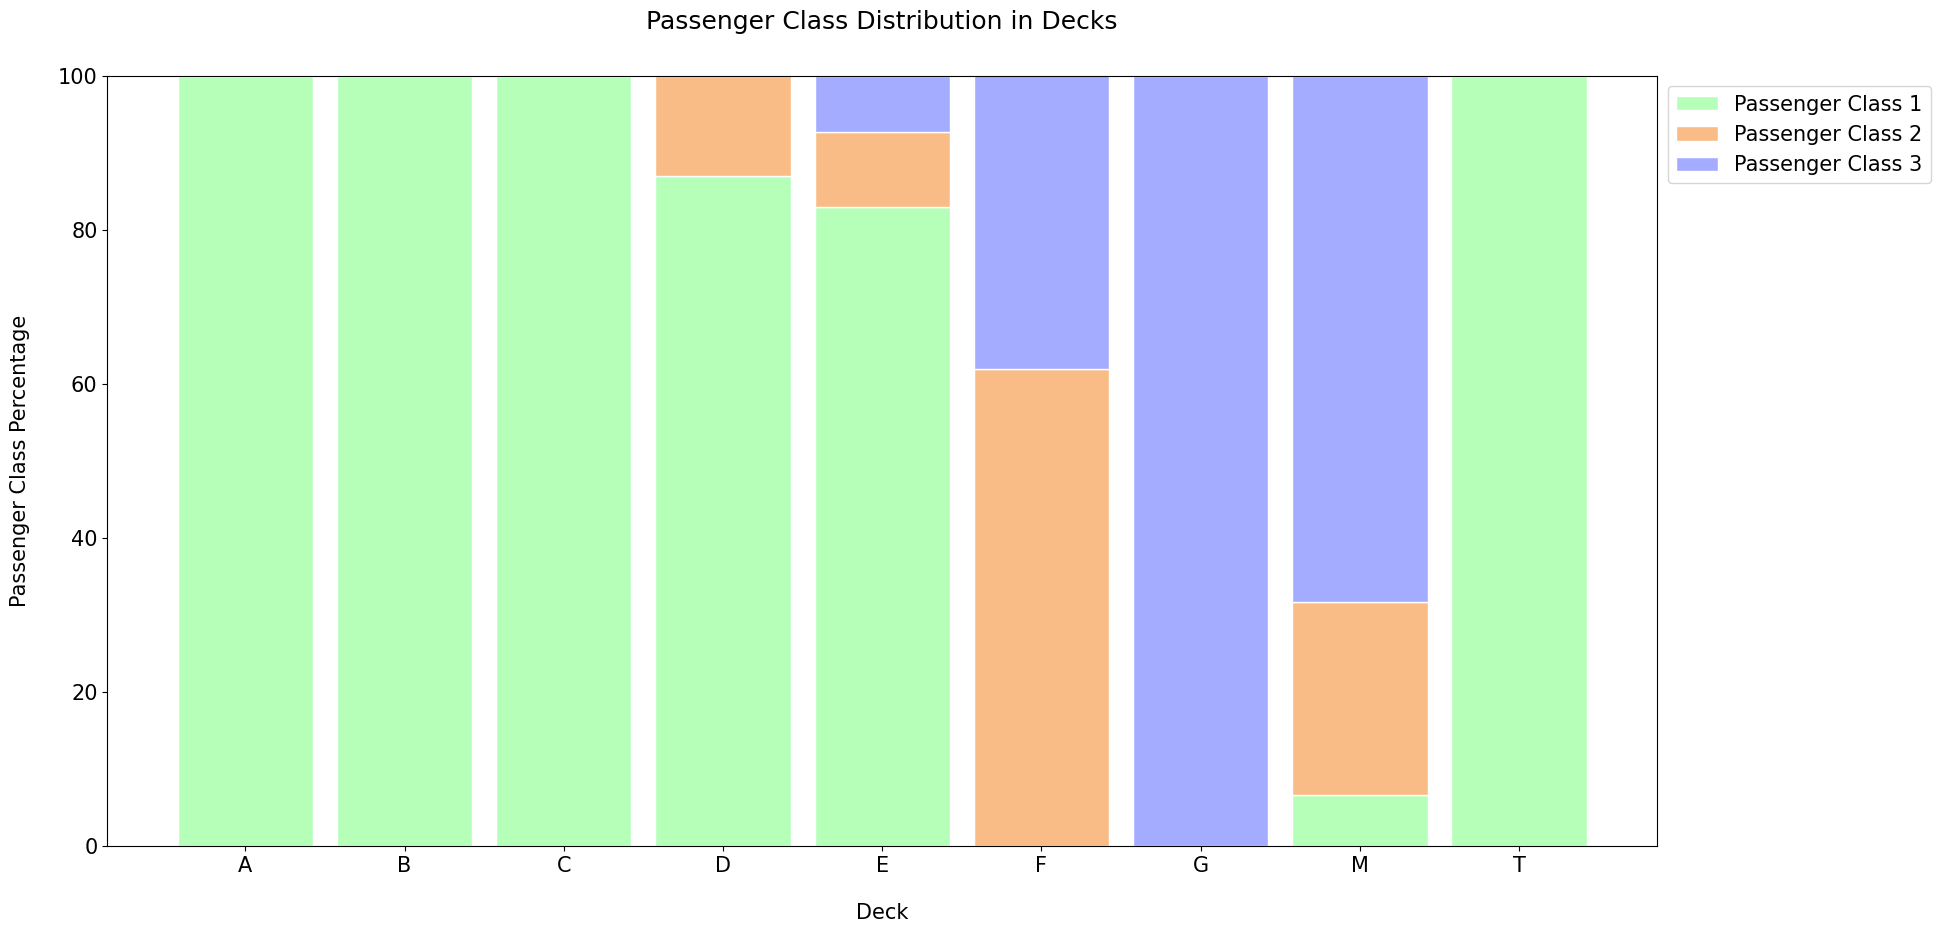

In [12]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
data['Deck'] = data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = data.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch',
                                                                      'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()
def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:  # deck get A, B, C...
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]  # df_all_decks[A...T][1...3][0] give count
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

- 100% of A, B and C decks are 1st class passengers
- Deck D has 87% 1st class and 13% 2nd class passengers
- Deck E has 83% 1st class, 10% 2nd class and 7% 3rd class passengers
- Deck F has 62% 2nd class and 38% 3rd class passengers
- 100% of G deck are 3rd class passengers
- There is one person on the boat deck in T cabin and he is a 1st class passenger. T cabin passenger has the closest resemblance to A deck passengers so he is grouped with A deck
- Passengers labeled as M are the missing values in Cabin feature. I don't think it is possible to find those passengers' real Deck so I decided to use M like a deck

In [13]:
# Passenger in the T deck is changed to A
idx = data[data['Deck'] == 'T'].index
data.loc[idx, 'Deck'] = 'A'

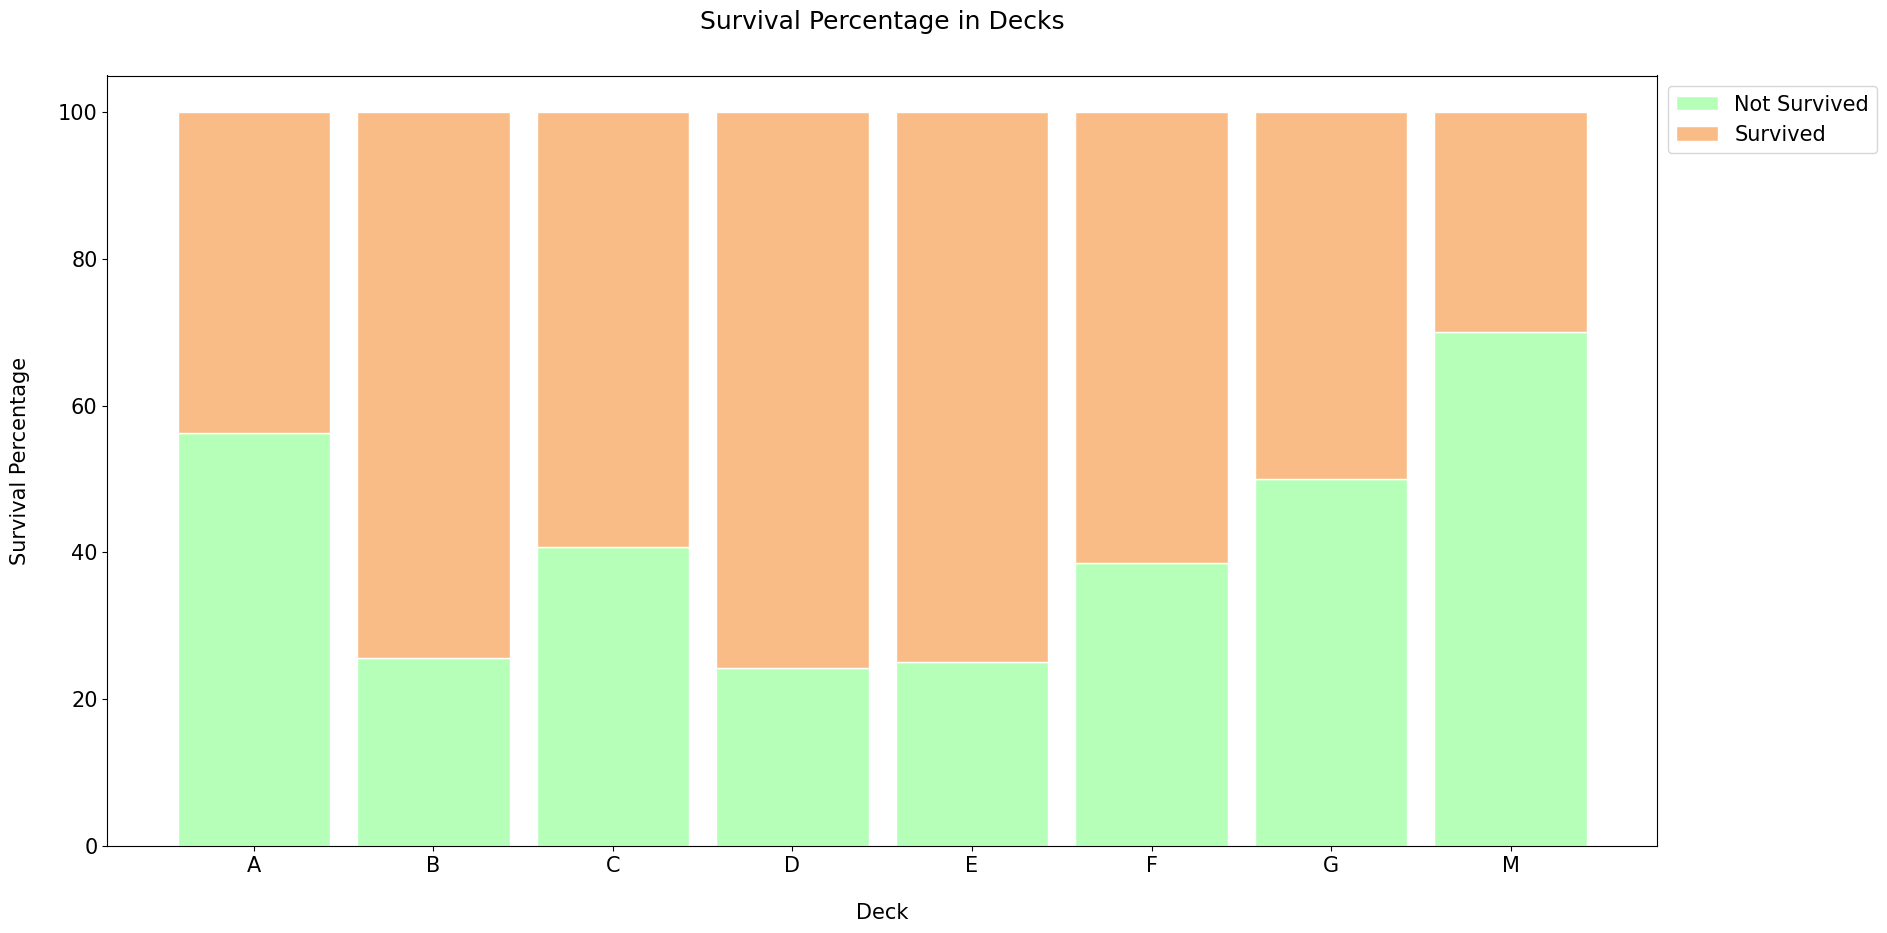

In [14]:
df_all_decks_survived = data.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                                                                                 'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

In [15]:
data['Deck'] = data['Deck'].replace(['A', 'B', 'C'], 'ABC')
data['Deck'] = data['Deck'].replace(['D', 'E'], 'DE')
data['Deck'] = data['Deck'].replace(['F', 'G'], 'FG')

data['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

- A, B and C decks are labeled as ABC because all of them have only 1st class passengers
- D and E decks are labeled as DE because both of them have similar passenger class distribution and same survival rate
- F and G decks are labeled as FG because of the same reason above
- M deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.

In [16]:
# Drop the Cabin feature and use Deck instead of Cabin
data.drop(['Cabin'], inplace=True, axis=1)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

trainData, testData = divide_df(data)
dfs = [trainData, testData]

def display_missing(df):    
    for col in df.columns.tolist():          
        print(f'{col} column missing values: {df[col].isnull().sum()}')
    print('\n')

for df in dfs:
    display_missing(df)

Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0


Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0




## 2. Exploratory Data Analysis

In [17]:
# information about train data
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Embarked     891 non-null    object 
 2   Fare         891 non-null    float64
 3   Name         891 non-null    object 
 4   Parch        891 non-null    int64  
 5   PassengerId  891 non-null    int64  
 6   Pclass       891 non-null    int64  
 7   Sex          891 non-null    object 
 8   SibSp        891 non-null    int64  
 9   Survived     891 non-null    float64
 10  Ticket       891 non-null    object 
 11  Deck         891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [18]:
# statistical information about numerical data
trainData.drop(["Embarked", "Name", "Sex", "Ticket", "Deck", "Survived", "PassengerId", "Pclass"], axis=1).describe()

Age        Fare       Parch       SibSp
count  891.000000  891.000000  891.000000  891.000000
mean    29.188182   32.204208    0.381594    0.523008
std     13.337887   49.693429    0.806057    1.102743
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    7.910400    0.000000    0.000000
50%     26.000000   14.454200    0.000000    0.000000
75%     36.000000   31.000000    0.000000    1.000000
max     80.000000  512.329200    6.000000    8.000000

In [19]:
# statistical information about categorical data
trainData[["Embarked", "Name", "Sex", "Ticket", "Deck"]].describe()

Embarked                     Name   Sex  Ticket Deck
count       891                      891   891     891  891
unique        3                      891     2     681    4
top           S  Braund, Mr. Owen Harris  male  347082    M
freq        646                        1   577       7  687

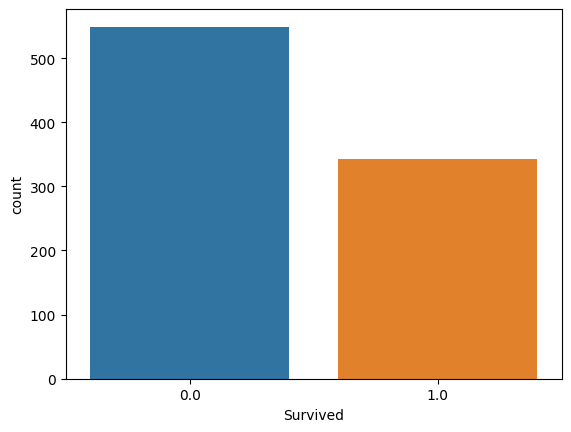

Number of samples According to Survived 
0.0    549
1.0    342
Name: Survived, dtype: int64


In [20]:
# Number of samples according to Survived
sns.countplot(x="Survived", data=trainData)
plt.xticks(rotation = 0)
plt.show()
print(f"Number of samples According to Survived \n{trainData['Survived'].value_counts()}")

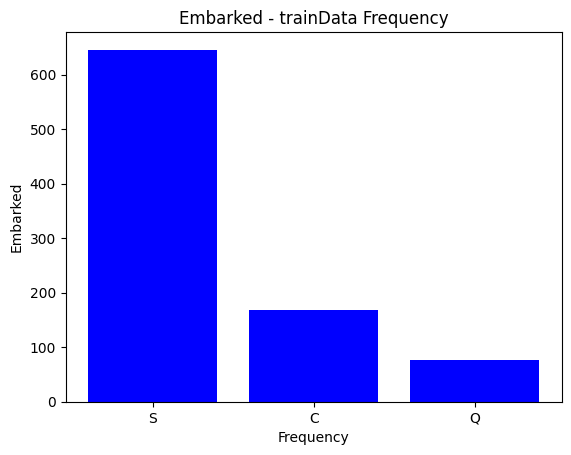

Number of Samples According to Embarked 
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [21]:
# Number of sample according to Embarked
plt.figure()
plt.bar(trainData["Embarked"].value_counts().index, trainData["Embarked"].value_counts(), color = "b")
plt.xlabel("Frequency")
plt.ylabel("Embarked")
plt.title("Embarked - trainData Frequency")
plt.show()
print(f"Number of Samples According to Embarked \n{trainData['Embarked'].value_counts()}")

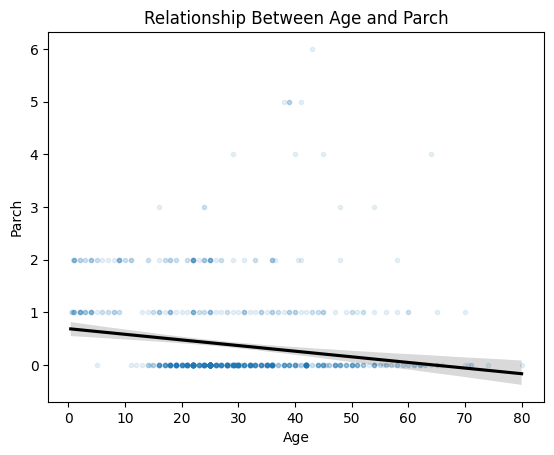

In [22]:
sns.regplot(x='Age', y='Parch', data=trainData, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"black"})
plt.title('Relationship Between Age and Parch')
plt.show()

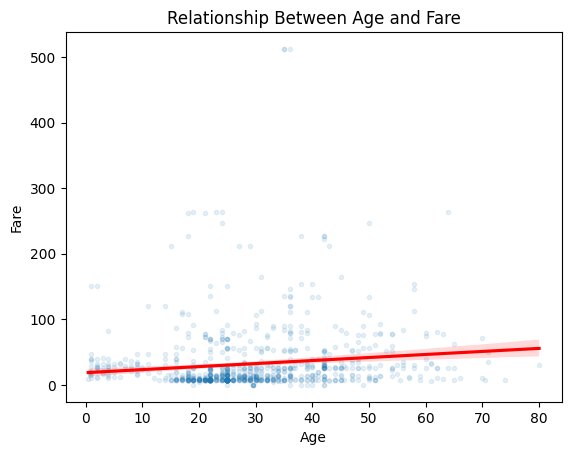

In [23]:
sns.regplot(x='Age', y='Fare', data=trainData, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"red"})
plt.title('Relationship Between Age and Fare')
plt.show()

In [24]:
# see the response results according to education
pd.crosstab(index= data['Embarked'] , columns=data['Survived'])

Survived  0.0  1.0
Embarked          
C          75   93
Q          47   30
S         427  219

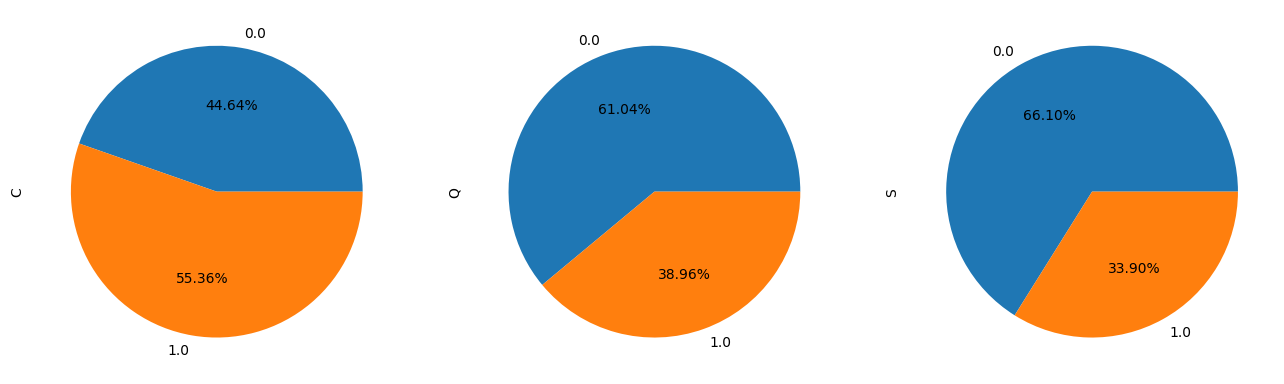

In [25]:
# see the survived rate according to Embarked
pd.crosstab(index=data['Survived'], columns=data['Embarked']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

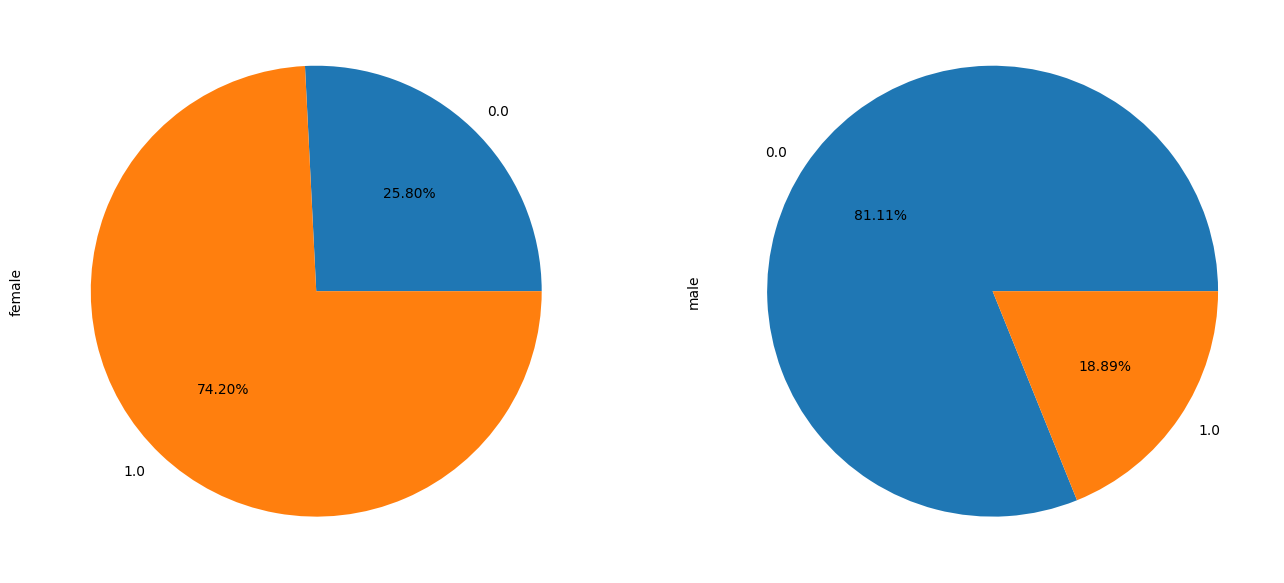

In [26]:
# see the survived rate according to Sex
pd.crosstab(index=data['Survived'], columns=data['Sex']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

In [27]:
pd.crosstab(trainData.Pclass, trainData.Survived, margins=True).style.background_gradient(cmap='Dark2')

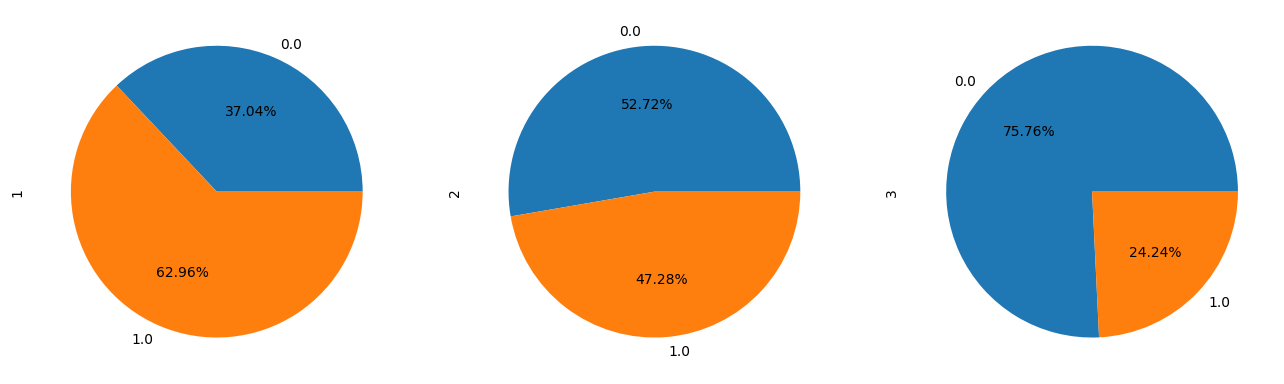

In [28]:
# see the survived rate according to Pclass
pd.crosstab(index=data['Survived'], columns=data['Pclass']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

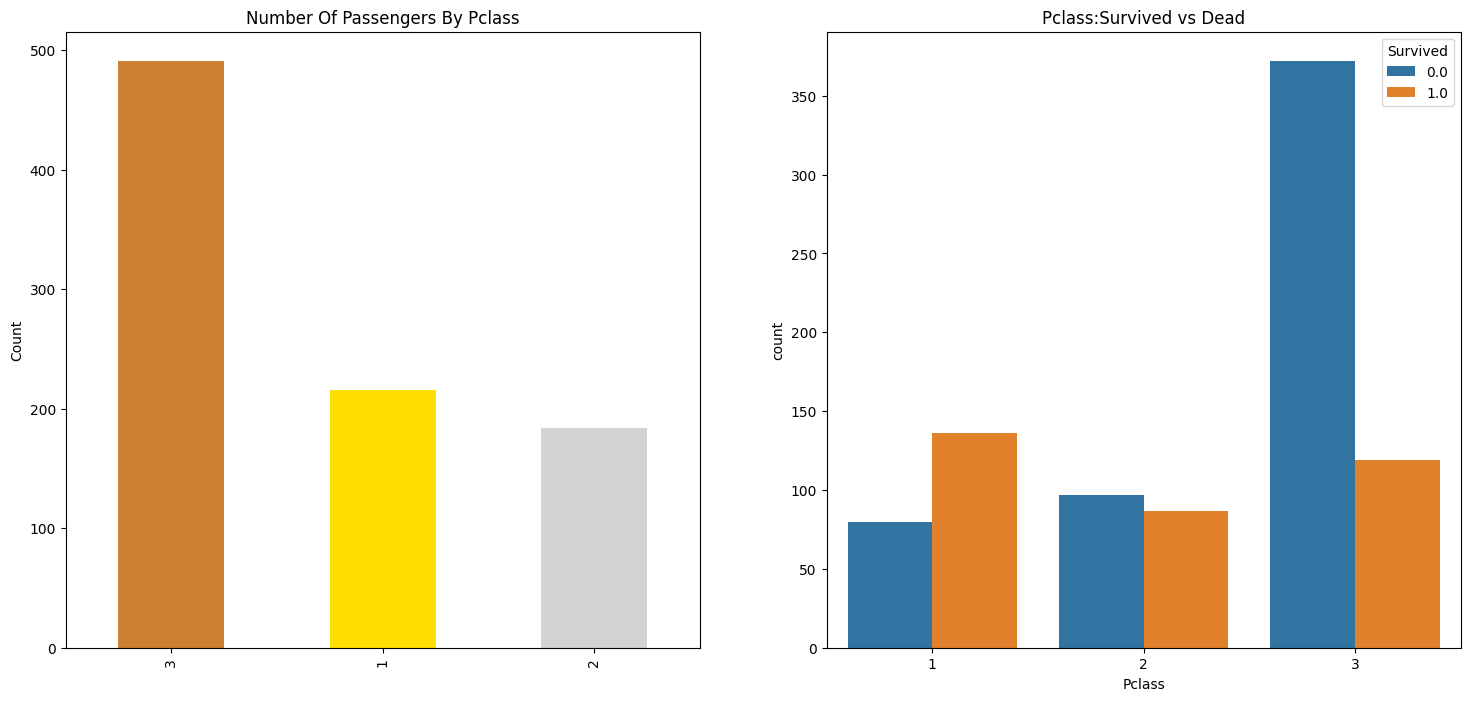

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
trainData['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=trainData, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [30]:
pd.crosstab([trainData.Sex, trainData.Survived], trainData.Pclass, margins=True).style.background_gradient(cmap='Dark2')

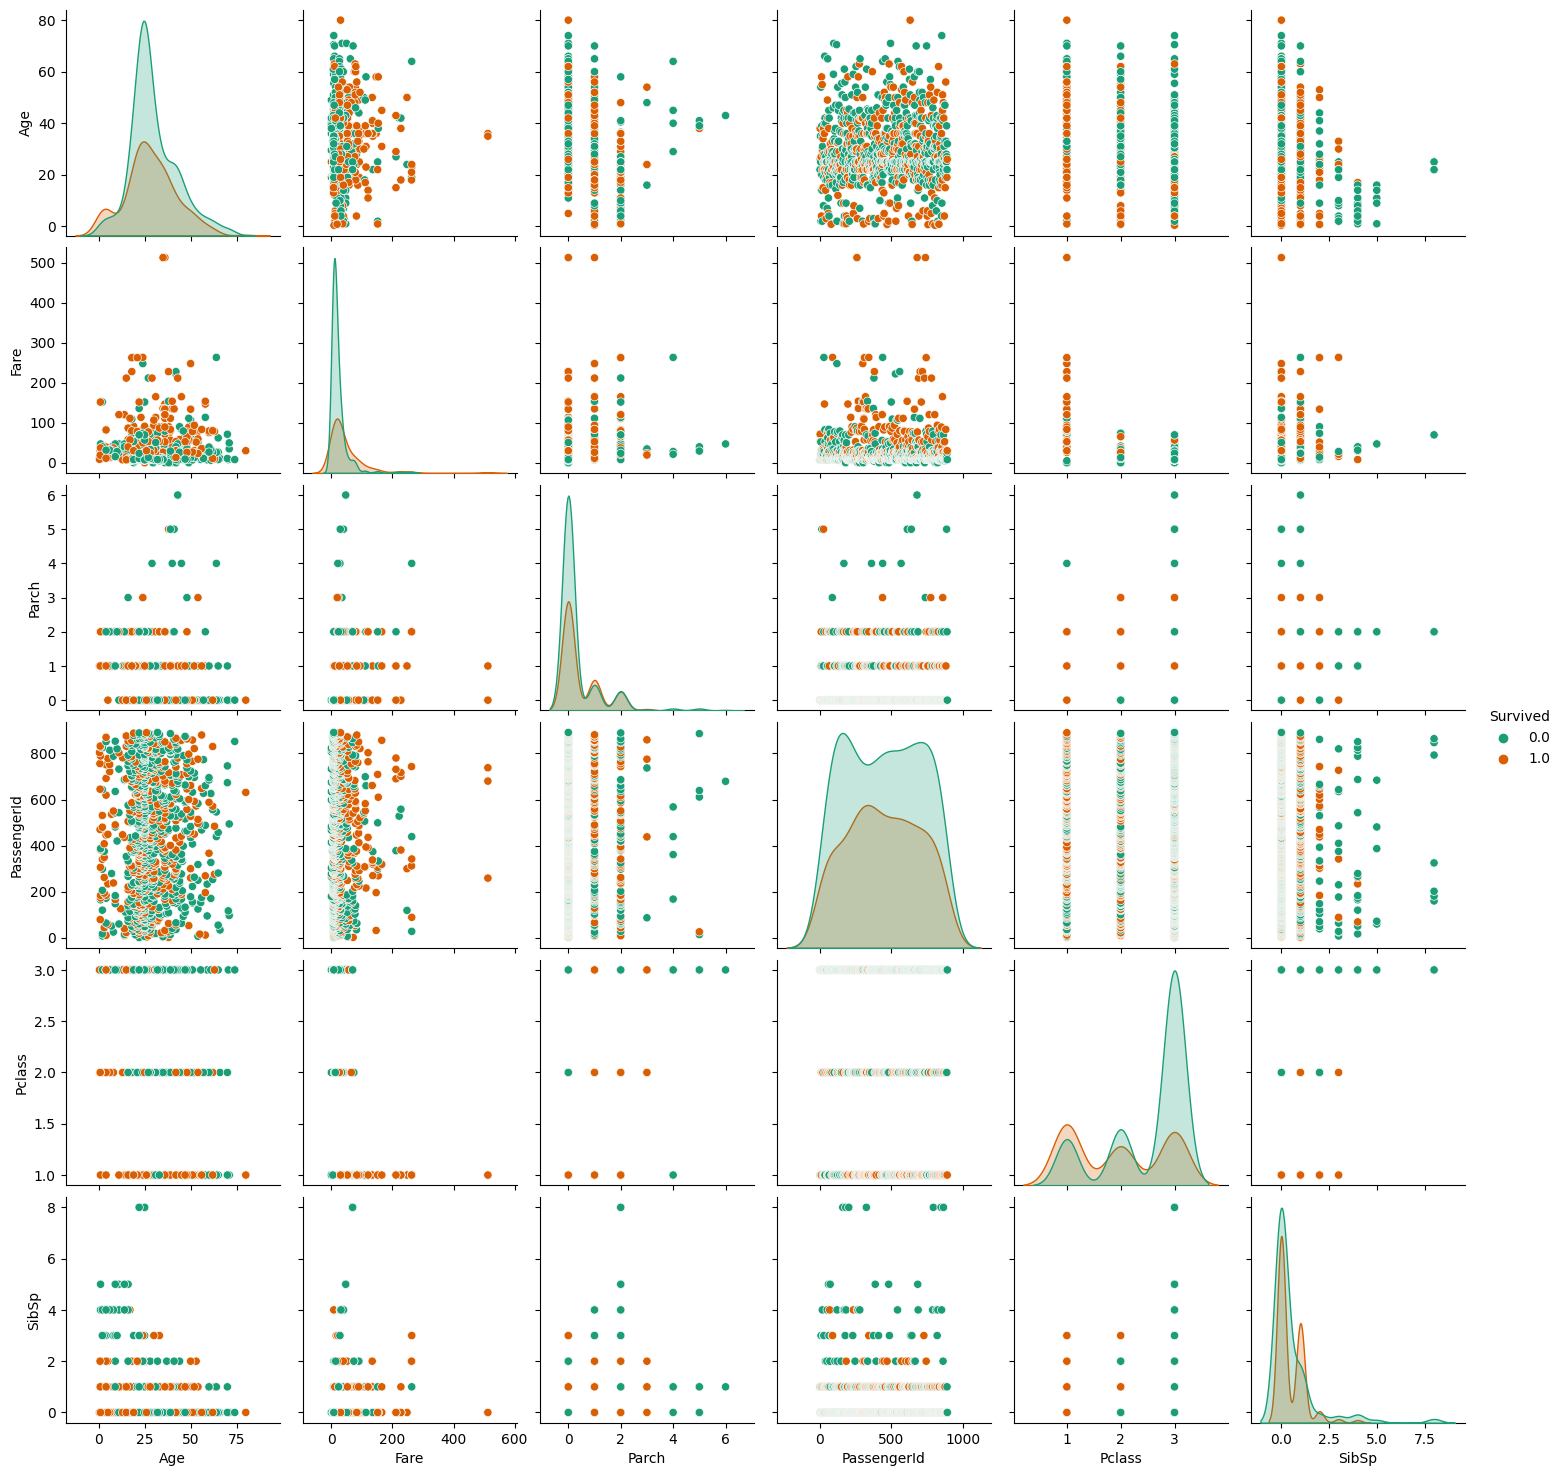

In [31]:
# see pairplot for relation between the columns
sns.pairplot(trainData,
             hue="Survived", palette='Dark2')
plt.show()

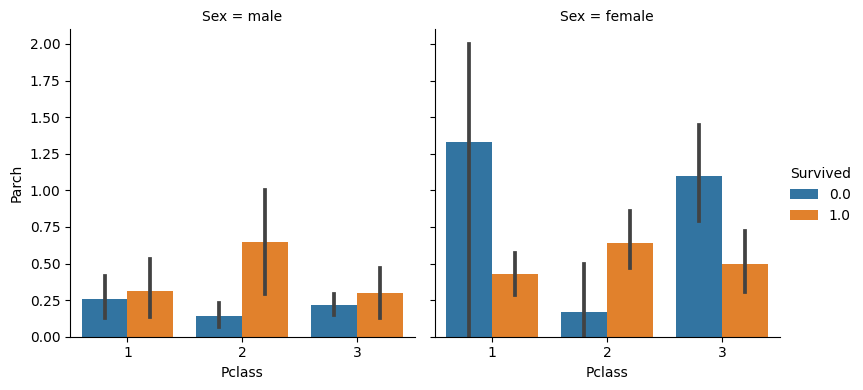

In [32]:
sns.catplot(x="Pclass", y="Parch",  hue="Survived", col="Sex",
            data=trainData, kind="bar", height=4)
plt.show()

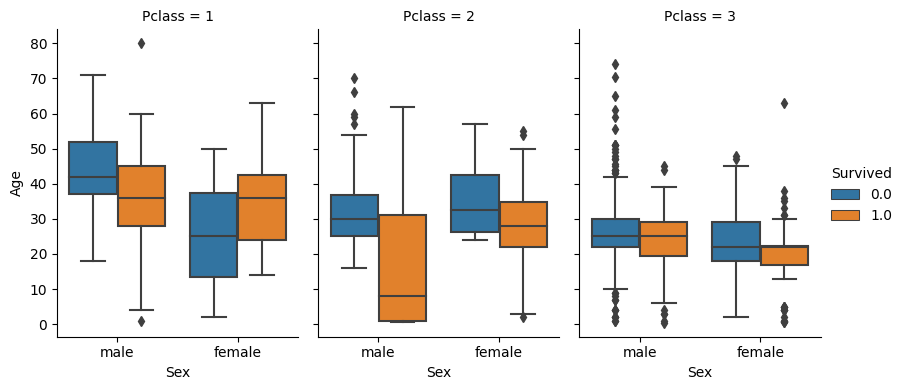

In [33]:
sns.catplot(x="Sex", y="Age", hue="Survived", col="Pclass",
            data=trainData, kind="box",height=4, aspect=.7);

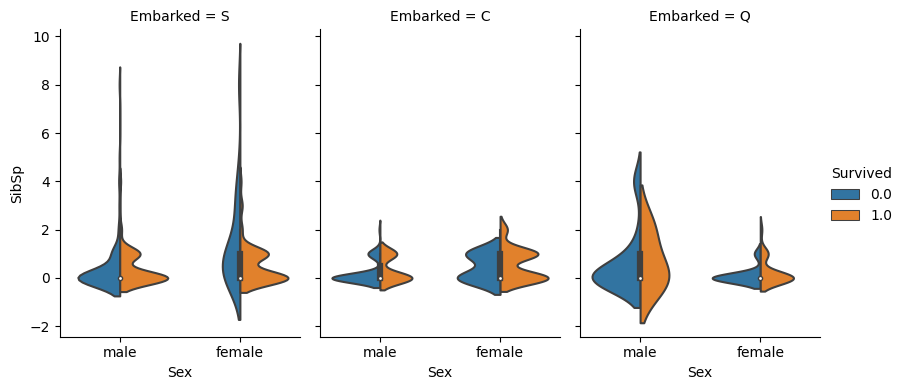

In [34]:
sns.catplot(x="Sex", y="SibSp",
                hue="Survived", col="Embarked",
                data=trainData, kind="violin", split=True,
                height=4, aspect=.7)
plt.show()

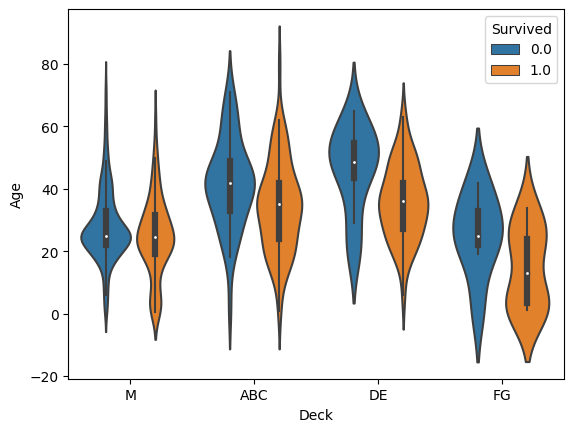

In [35]:
sns.violinplot(x="Deck", y="Age", data=trainData, hue="Survived")
plt.show()

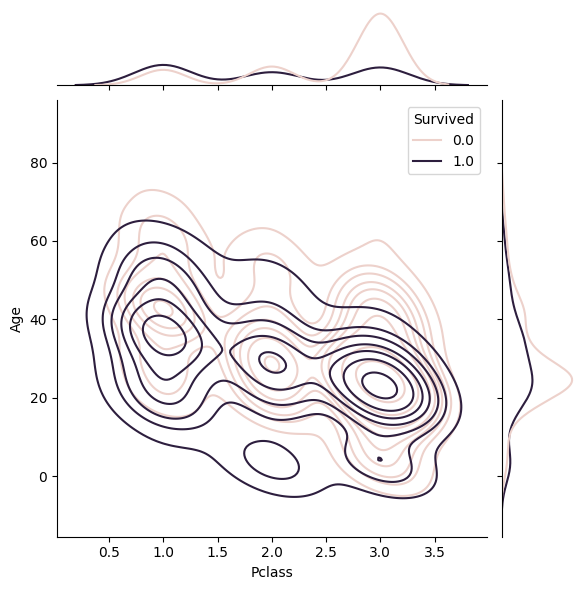

In [36]:
sns.jointplot(
    data=data,
    x="Pclass", y="Age", hue="Survived",
    kind="kde")
plt.show()

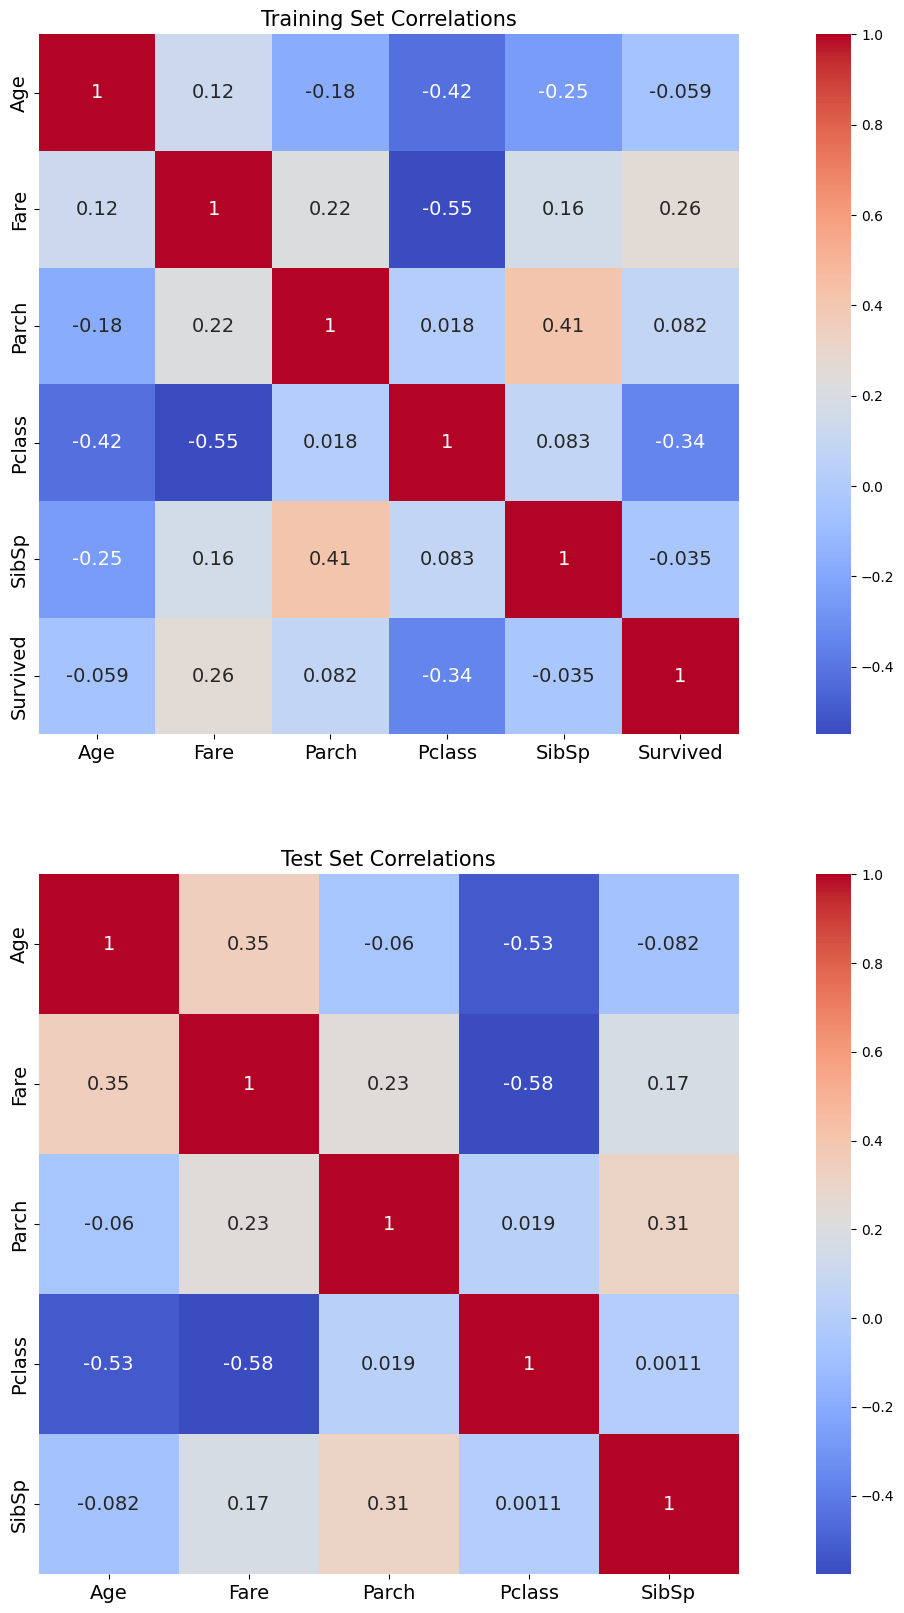

In [37]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(trainData.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(testData.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

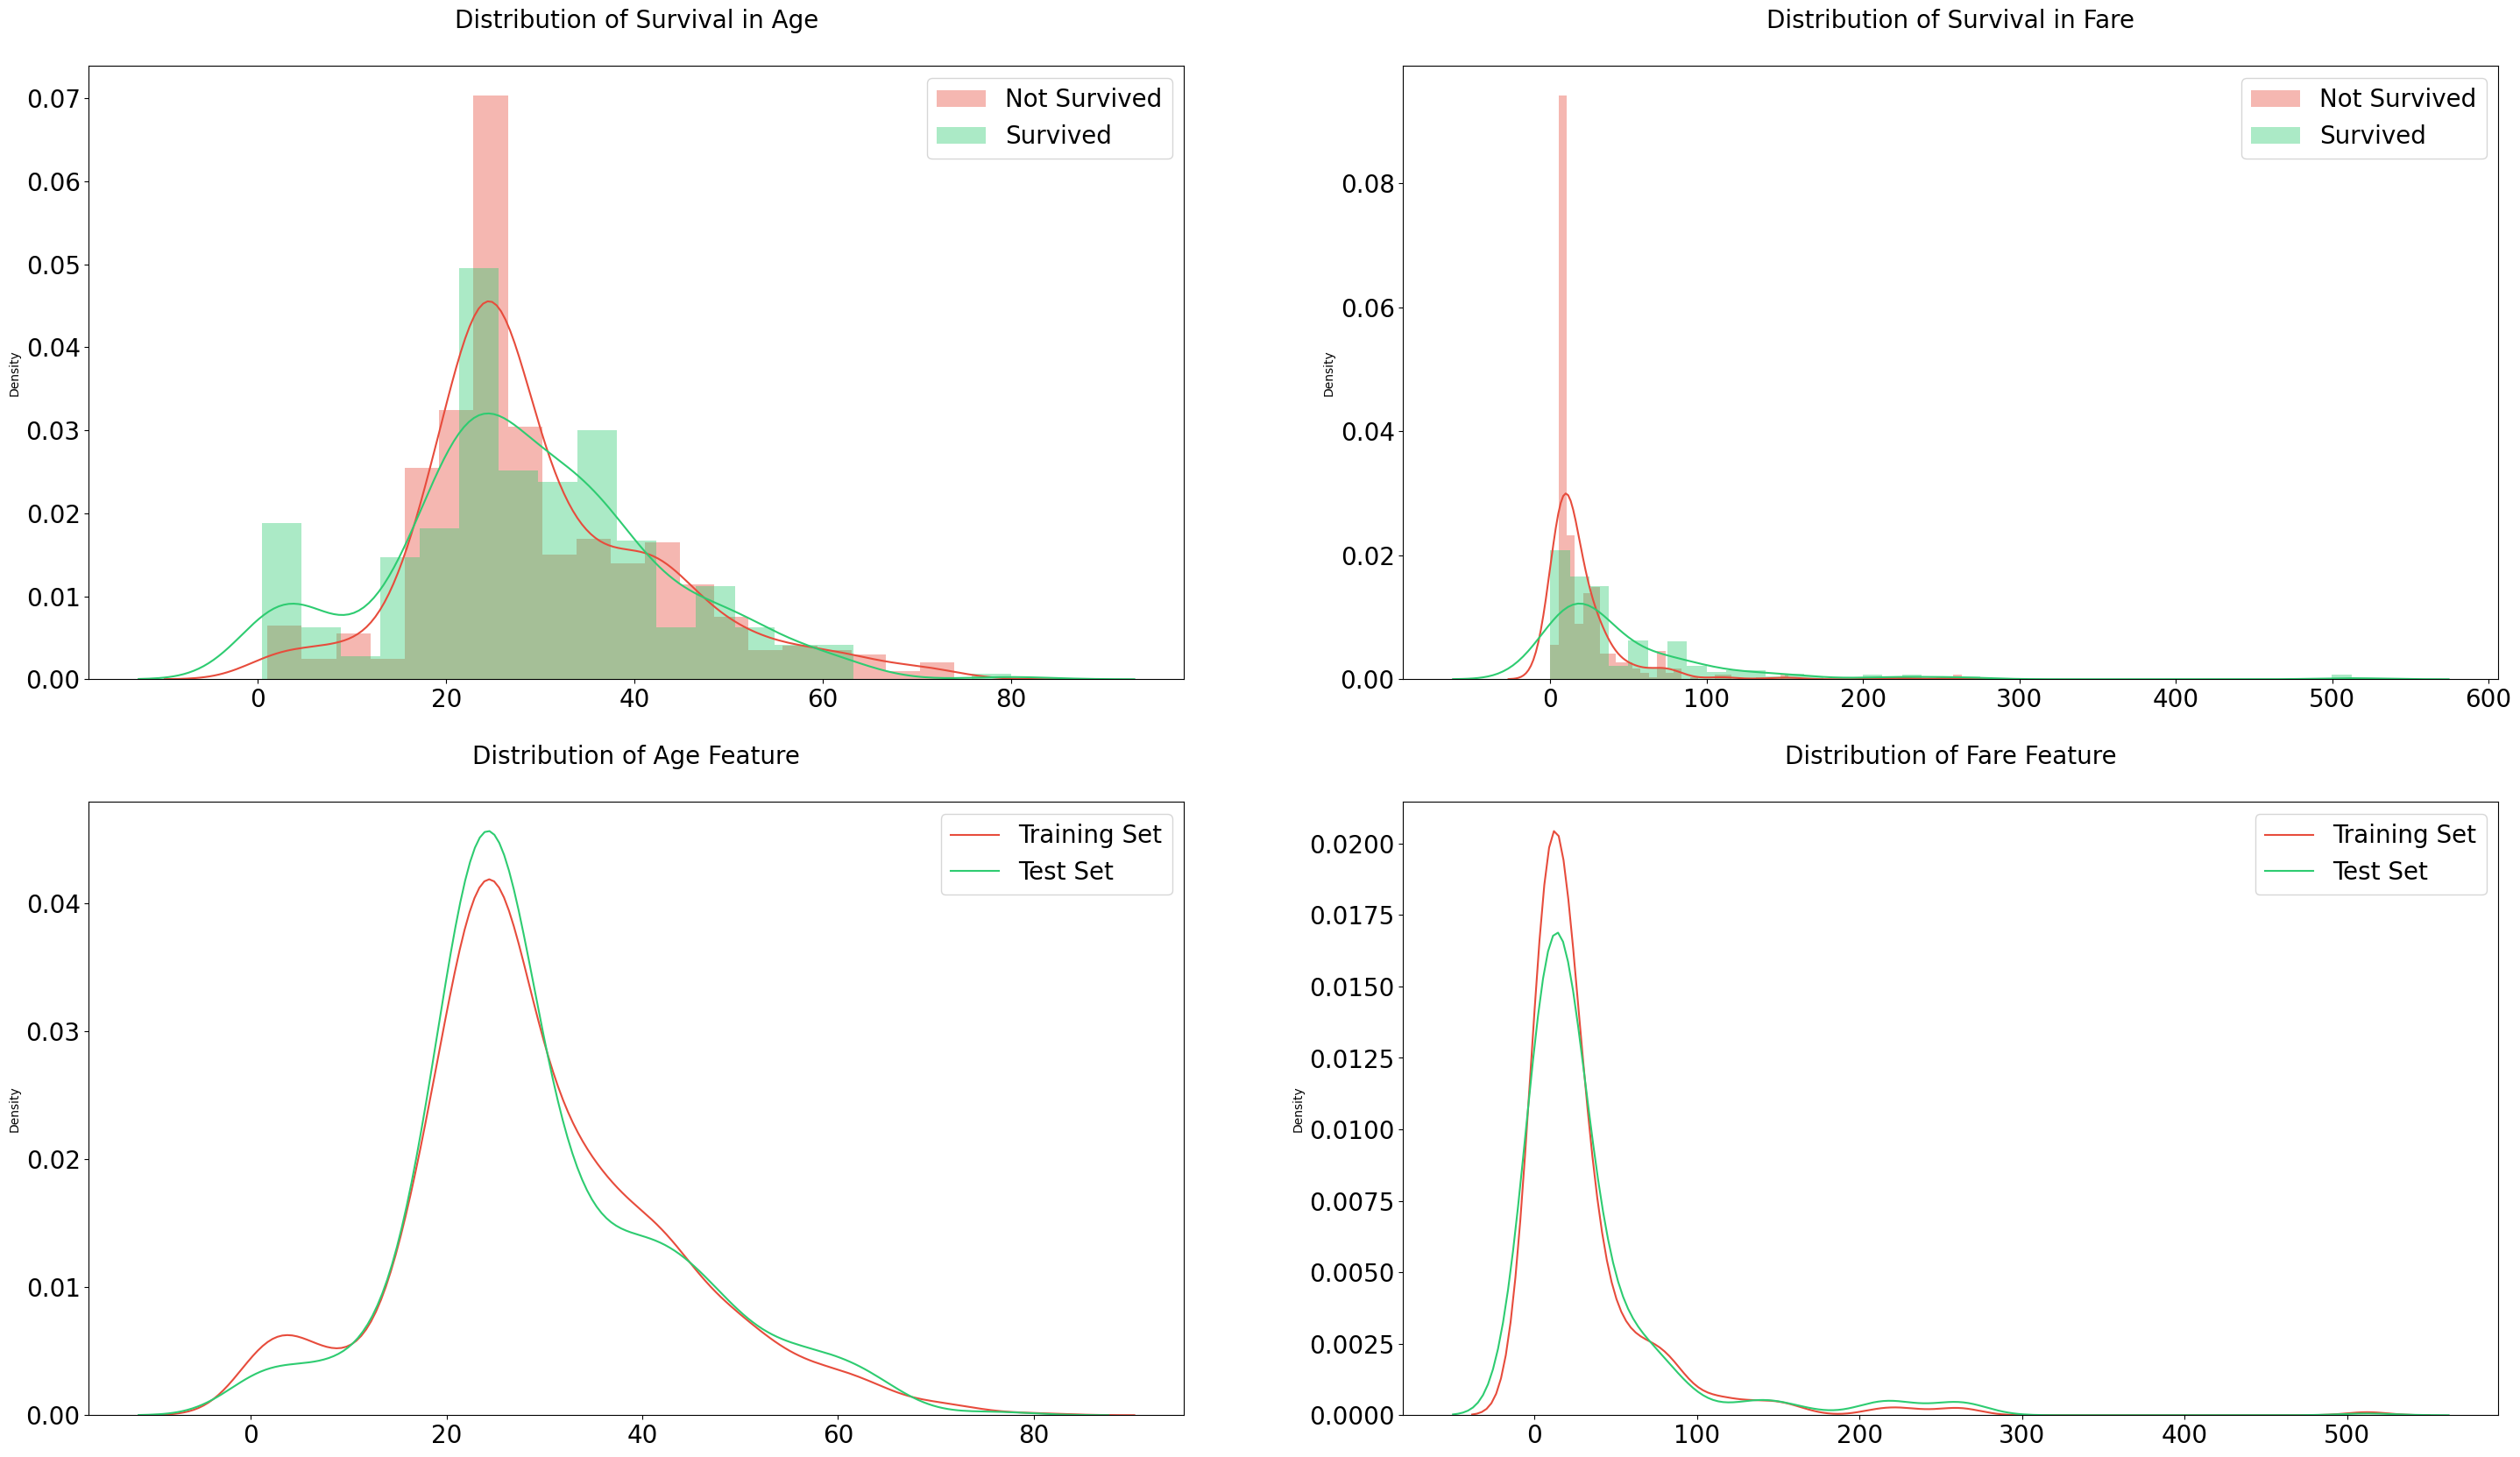

In [38]:
cont_features = ['Age', 'Fare']
surv = trainData['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(trainData[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(trainData[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(trainData[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(testData[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

## 3. Feature Engineering

#### 3.1 FamilySize & FamilySizeGrouped

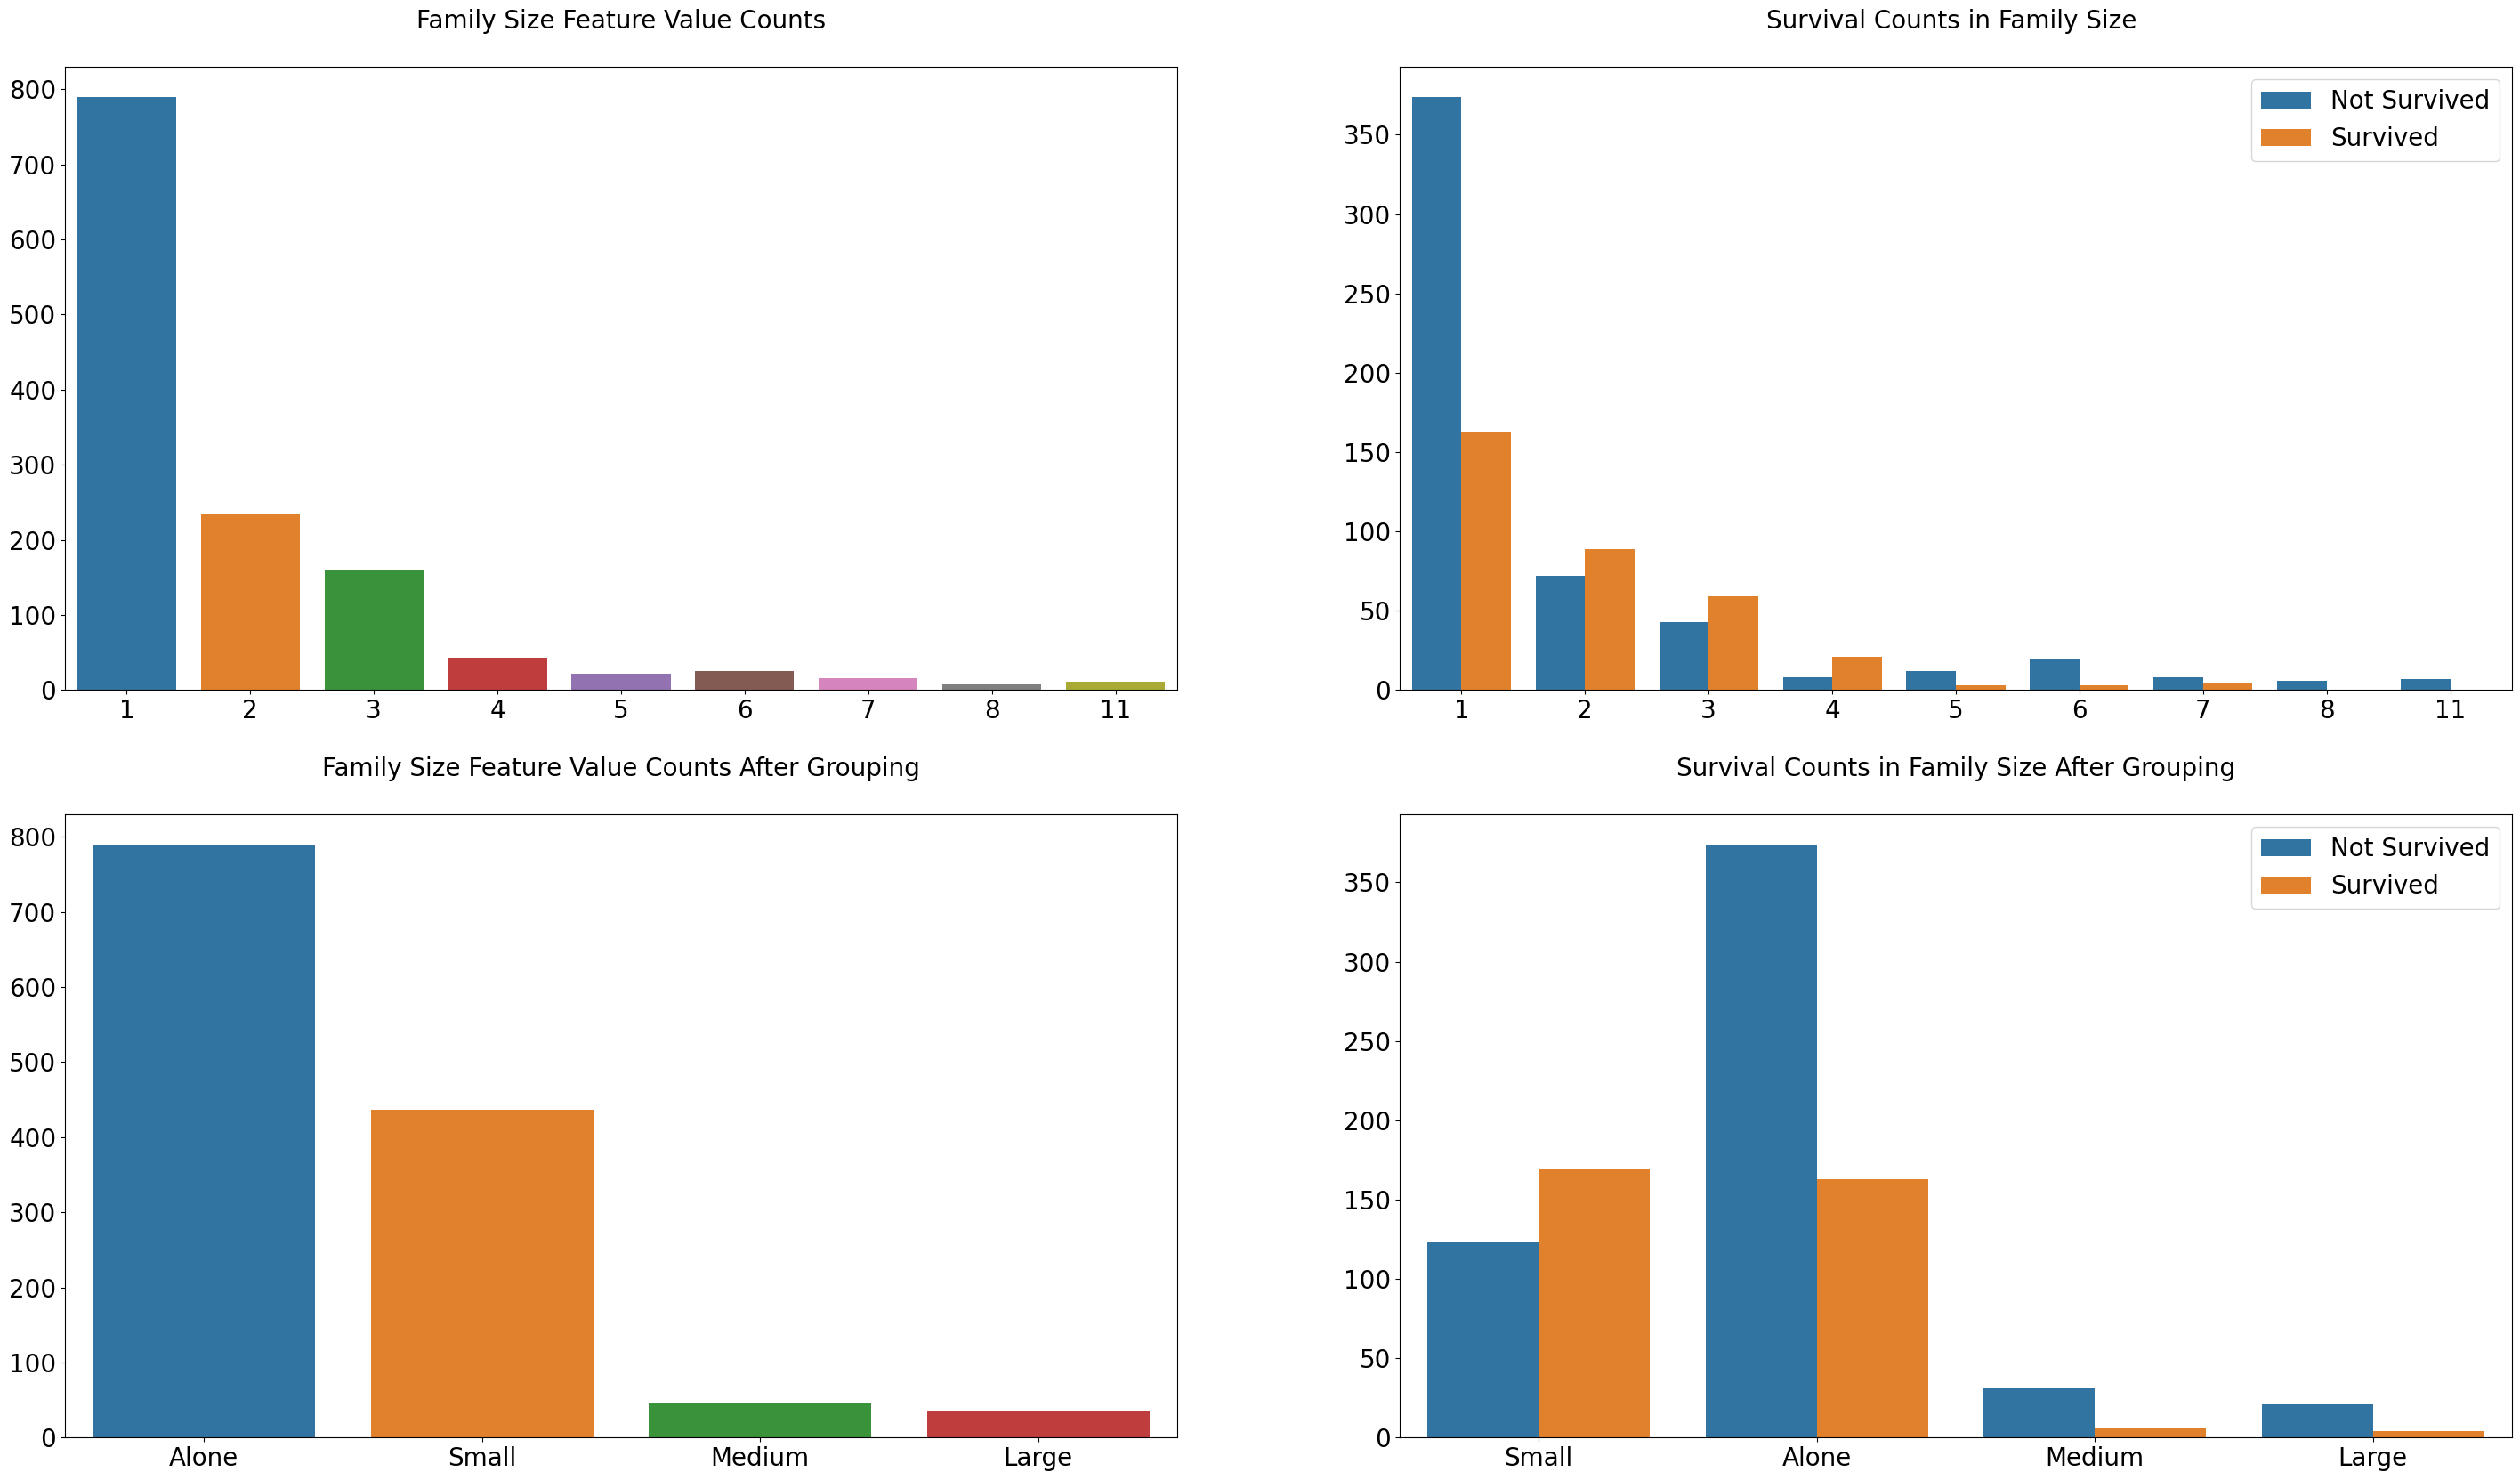

In [39]:
# new feature FamilySize
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=data['FamilySize'].value_counts().index, y=data['FamilySize'].value_counts().values, ax=axs[0][0])
sns.countplot(x='FamilySize', hue='Survived', data=data, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
data['FamilySizeGrouped'] = data['FamilySize'].map(family_map)

sns.barplot(x=data['FamilySizeGrouped'].value_counts().index, y=data['FamilySizeGrouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='FamilySizeGrouped', hue='Survived', data=data, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

#### 3.2 Title & IsMarried

In [40]:
tempdata = data.copy() 
tempdata['Initial']=0
for i in data:
    tempdata['Initial'] = tempdata.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [41]:
pd.crosstab(tempdata.Initial, tempdata.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

In [42]:
# new feature title and ıs_married
data['Title'] = data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
data['IsMarried'] = 0
data['IsMarried'].loc[data['Title'] == 'Mrs'] = 1

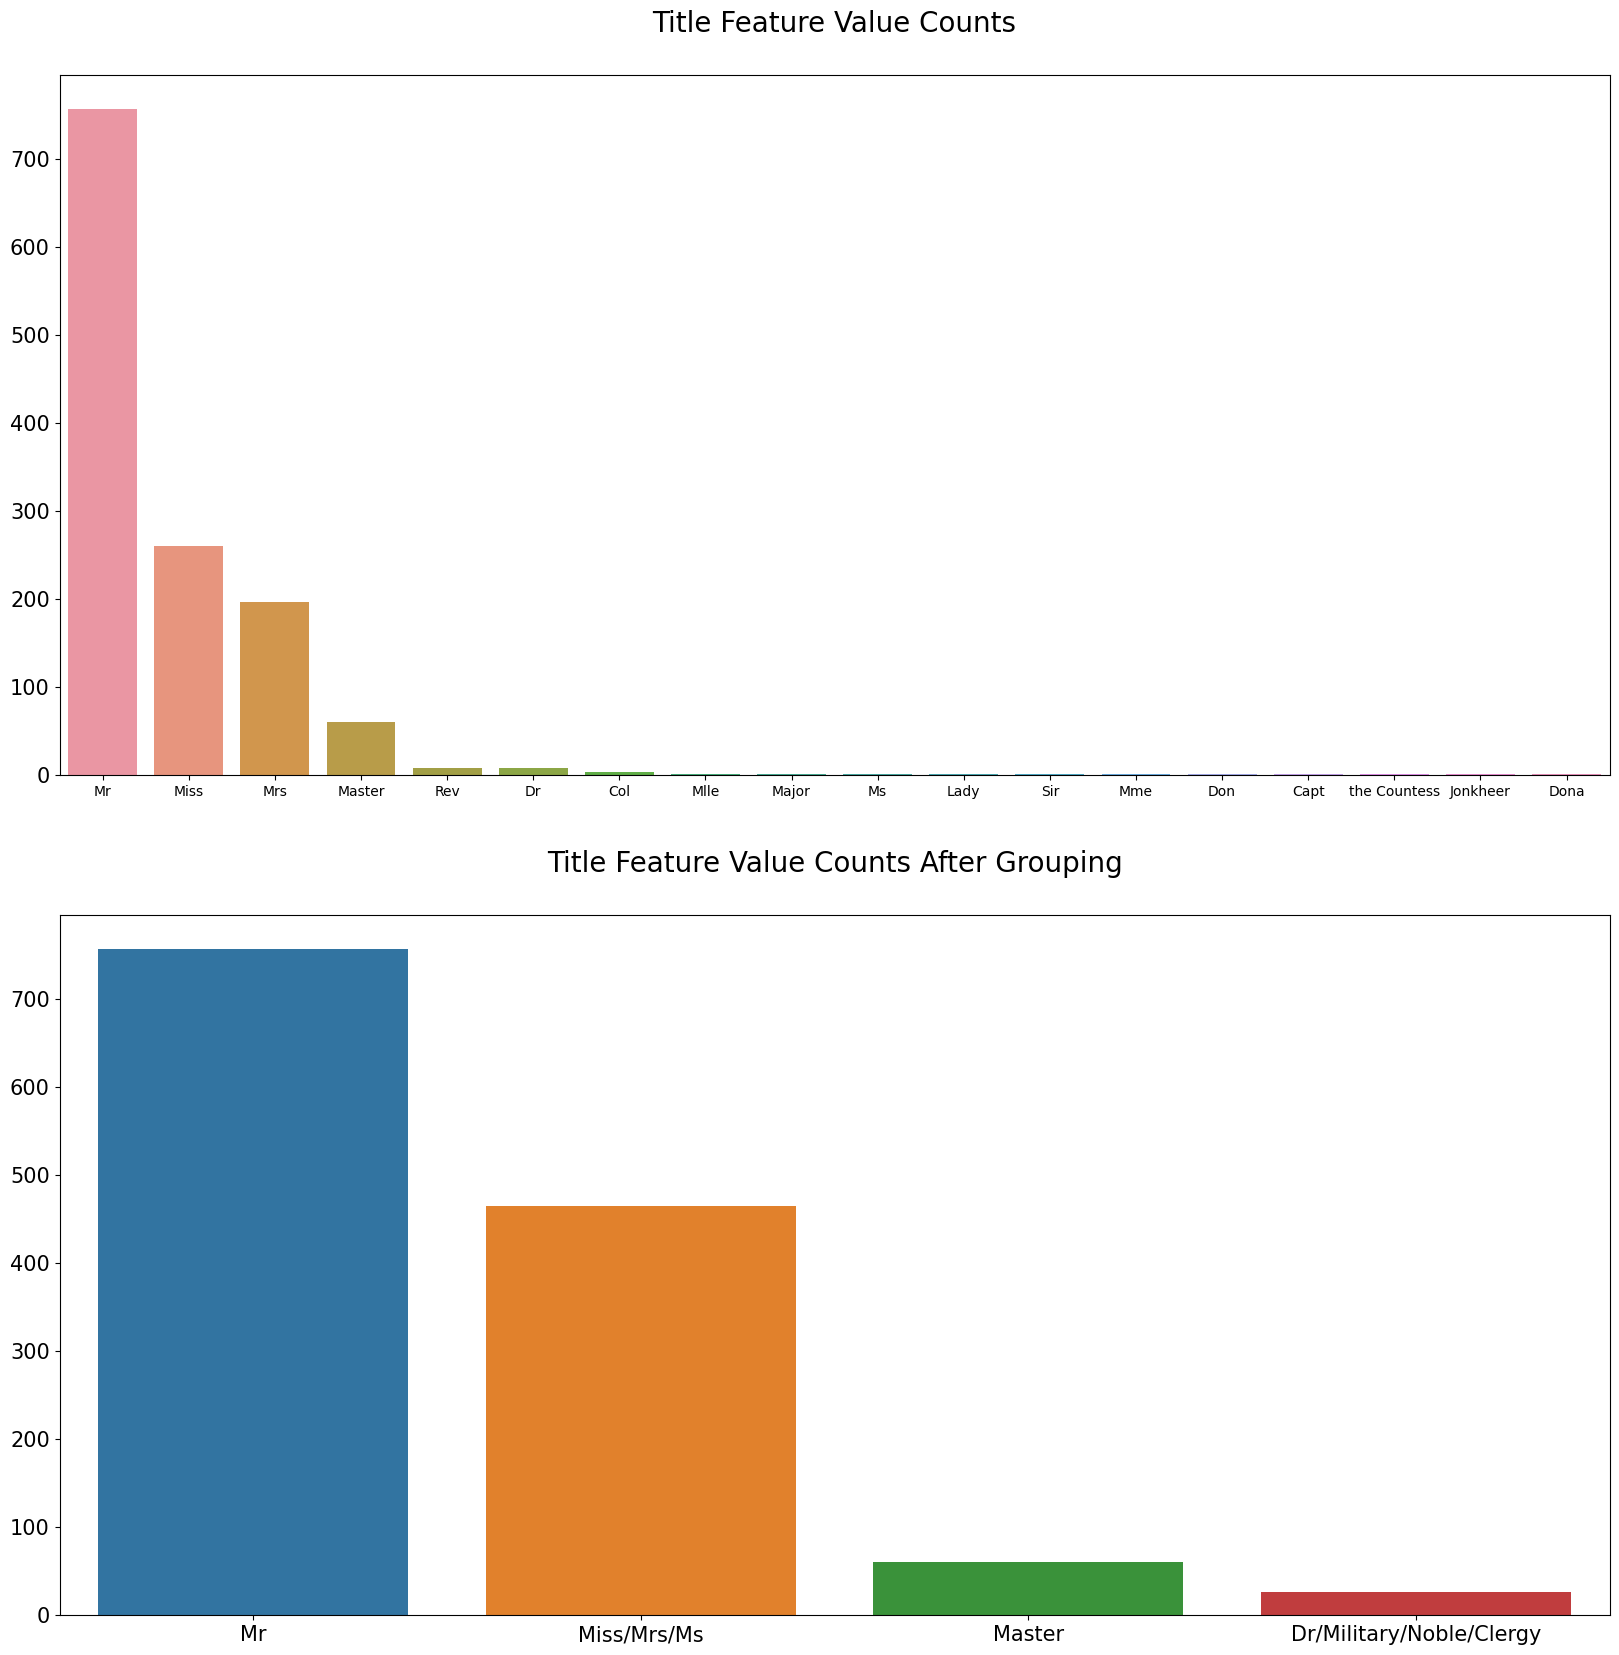

In [43]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=data['Title'].value_counts().index, y=data['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

data['Title'] = data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
data['Title'] = data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=data['Title'].value_counts().index, y=data['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

#### 3.3 AgeBin & FareBin

In [44]:
# new features AgeBin and FareBin
data['AgeBin'] = pd.cut(data['Age'].astype(int), 5)
data['FareBin'] = pd.qcut(data['Fare'], 4)

#### 3.4 TicketFrequency

In [45]:
data['Ticket_Frequency'] = data.groupby('Ticket')['Ticket'].transform('count')

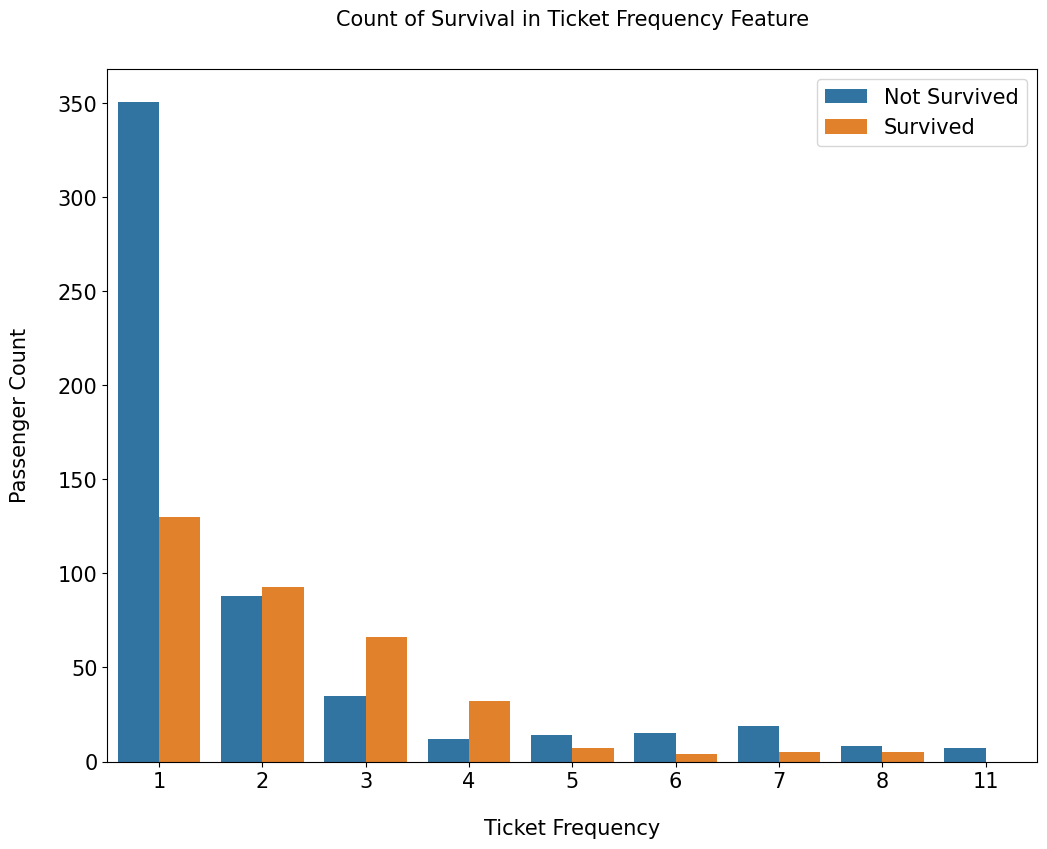

In [46]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=data)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

## 4. Preprocessing

In [47]:
# for submission file 
PassengerID = testData["PassengerId"]

In [48]:
# drop some column 
data.drop(['Age', 'Fare', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [49]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Embarked           1309 non-null   object  
 1   Parch              1309 non-null   int64   
 2   Pclass             1309 non-null   int64   
 3   Sex                1309 non-null   object  
 4   SibSp              1309 non-null   int64   
 5   Survived           891 non-null    float64 
 6   Deck               1309 non-null   object  
 7   FamilySize         1309 non-null   int64   
 8   FamilySizeGrouped  1309 non-null   object  
 9   Title              1309 non-null   object  
 10  IsMarried          1309 non-null   int64   
 11  AgeBin             1309 non-null   category
 12  FareBin            1309 non-null   category
 13  Ticket_Frequency   1309 non-null   int64   
dtypes: category(2), float64(1), int64(6), object(5)
memory usage: 125.9+ KB


In [50]:
# statistical information about categorical data
data[["Embarked", "Sex", "Deck", "AgeBin", "FareBin", "Title", "FamilySizeGrouped"]].describe()

Embarked   Sex  Deck        AgeBin          FareBin Title  \
count      1309  1309  1309          1309             1309  1309   
unique        3     2     4             5                4     4   
top           S  male     M  (16.0, 32.0]  (-0.001, 7.896]    Mr   
freq        916   843  1014           752              337   757   

       FamilySizeGrouped  
count               1309  
unique                 4  
top                Alone  
freq                 790

In [51]:
# use label encoder for Sex, use OneHotEncoder for other categorical features

# use label encoder for Sex
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

data["Sex"] = labelEncoder(data["Sex"])

Encoding Approach:
male  ==>  1
female  ==>  0


In [52]:
# use OneHotEncoder for other categorical features
data = pd.get_dummies(data, columns=['Embarked', "Deck", "AgeBin", "FareBin", "Title", "FamilySizeGrouped"])
data.head(3)

Parch  Pclass  Sex  SibSp  Survived  FamilySize  IsMarried  \
0      0       3    1      1       0.0           2          0   
1      0       1    0      1       1.0           2          1   
2      0       3    0      0       1.0           1          0   

   Ticket_Frequency  Embarked_C  Embarked_Q  ...  FareBin_(14.454, 31.275]  \
0                 1           0           0  ...                         0   
1                 2           1           0  ...                         0   
2                 1           0           0  ...                         0   

   FareBin_(31.275, 512.329]  Title_Dr/Military/Noble/Clergy  Title_Master  \
0                          0                               0             0   
1                          1                               0             0   
2                          0                               0             0   

   Title_Miss/Mrs/Ms  Title_Mr  FamilySizeGrouped_Alone  \
0                  0         1                        0   
1                  1         0                        0   
2                  1         0                        1   

   FamilySizeGrouped_Large  FamilySizeGrouped_Medium  FamilySizeGrouped_Small  
0                        0                         0                        1  
1                        0                         0                        1  
2                        0                         0                        0  

[3 rows x 32 columns]

In [53]:
trainData, testData = divide_df(data)
y_train = trainData['Survived']

In [54]:
# for normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainData)
trainData = pd.DataFrame(scaler.transform(trainData), columns= trainData.columns)

scaler.fit(testData)
testData = pd.DataFrame(scaler.transform(testData), columns= testData.columns)

In [55]:
# create input and output
X_train = trainData.drop('Survived', axis = 1)
X_test = testData
data.drop(["Survived"], axis=1, inplace=True)

In [56]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (891, 31)
y_train shape: (891,)
X_test shape: (418, 31)


## 5. Model Training and Evaluation

In [57]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
SEED = 42

In [58]:
# leaderboard_model overfits to test set so it's not suggested to use models like this in real life projects.
# single_best_model is a good model to start experimenting and learning about decision trees.

single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1) 

In [59]:
N = 5
oob = 0
probs = pd.DataFrame(np.zeros((len(X_test), N * 2)), columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=data.columns)
fprs, tprs, scores = [], [], []

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print('Fold {}\n'.format(fold))
    
    # Fitting the model
    leaderboard_model.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
    
    # Computing Train AUC score
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(y_train.iloc[trn_idx], leaderboard_model.predict_proba(X_train.iloc[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
    # Computing Validation AUC score
    val_fpr, val_tpr, val_thresholds = roc_curve(y_train.iloc[val_idx], leaderboard_model.predict_proba(X_train.iloc[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)  
      
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    # X_test probabilities
    probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 0]
    probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 1]
    importances.iloc[:, fold - 1] = leaderboard_model.feature_importances_
        
    oob += leaderboard_model.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, leaderboard_model.oob_score_))   
    
print('Average OOB Score: {}'.format(oob))

Fold 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent worker

Fold 1 OOB Score: 0.848314606741573

Fold 2



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent worker

Fold 2 OOB Score: 0.8373071528751753

Fold 3



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    6.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent worker

Fold 3 OOB Score: 0.8387096774193549

Fold 4



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent worker

Fold 4 OOB Score: 0.8302945301542777

Fold 5



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent worker

Fold 5 OOB Score: 0.814866760168303

Average OOB Score: 0.8338985454717368


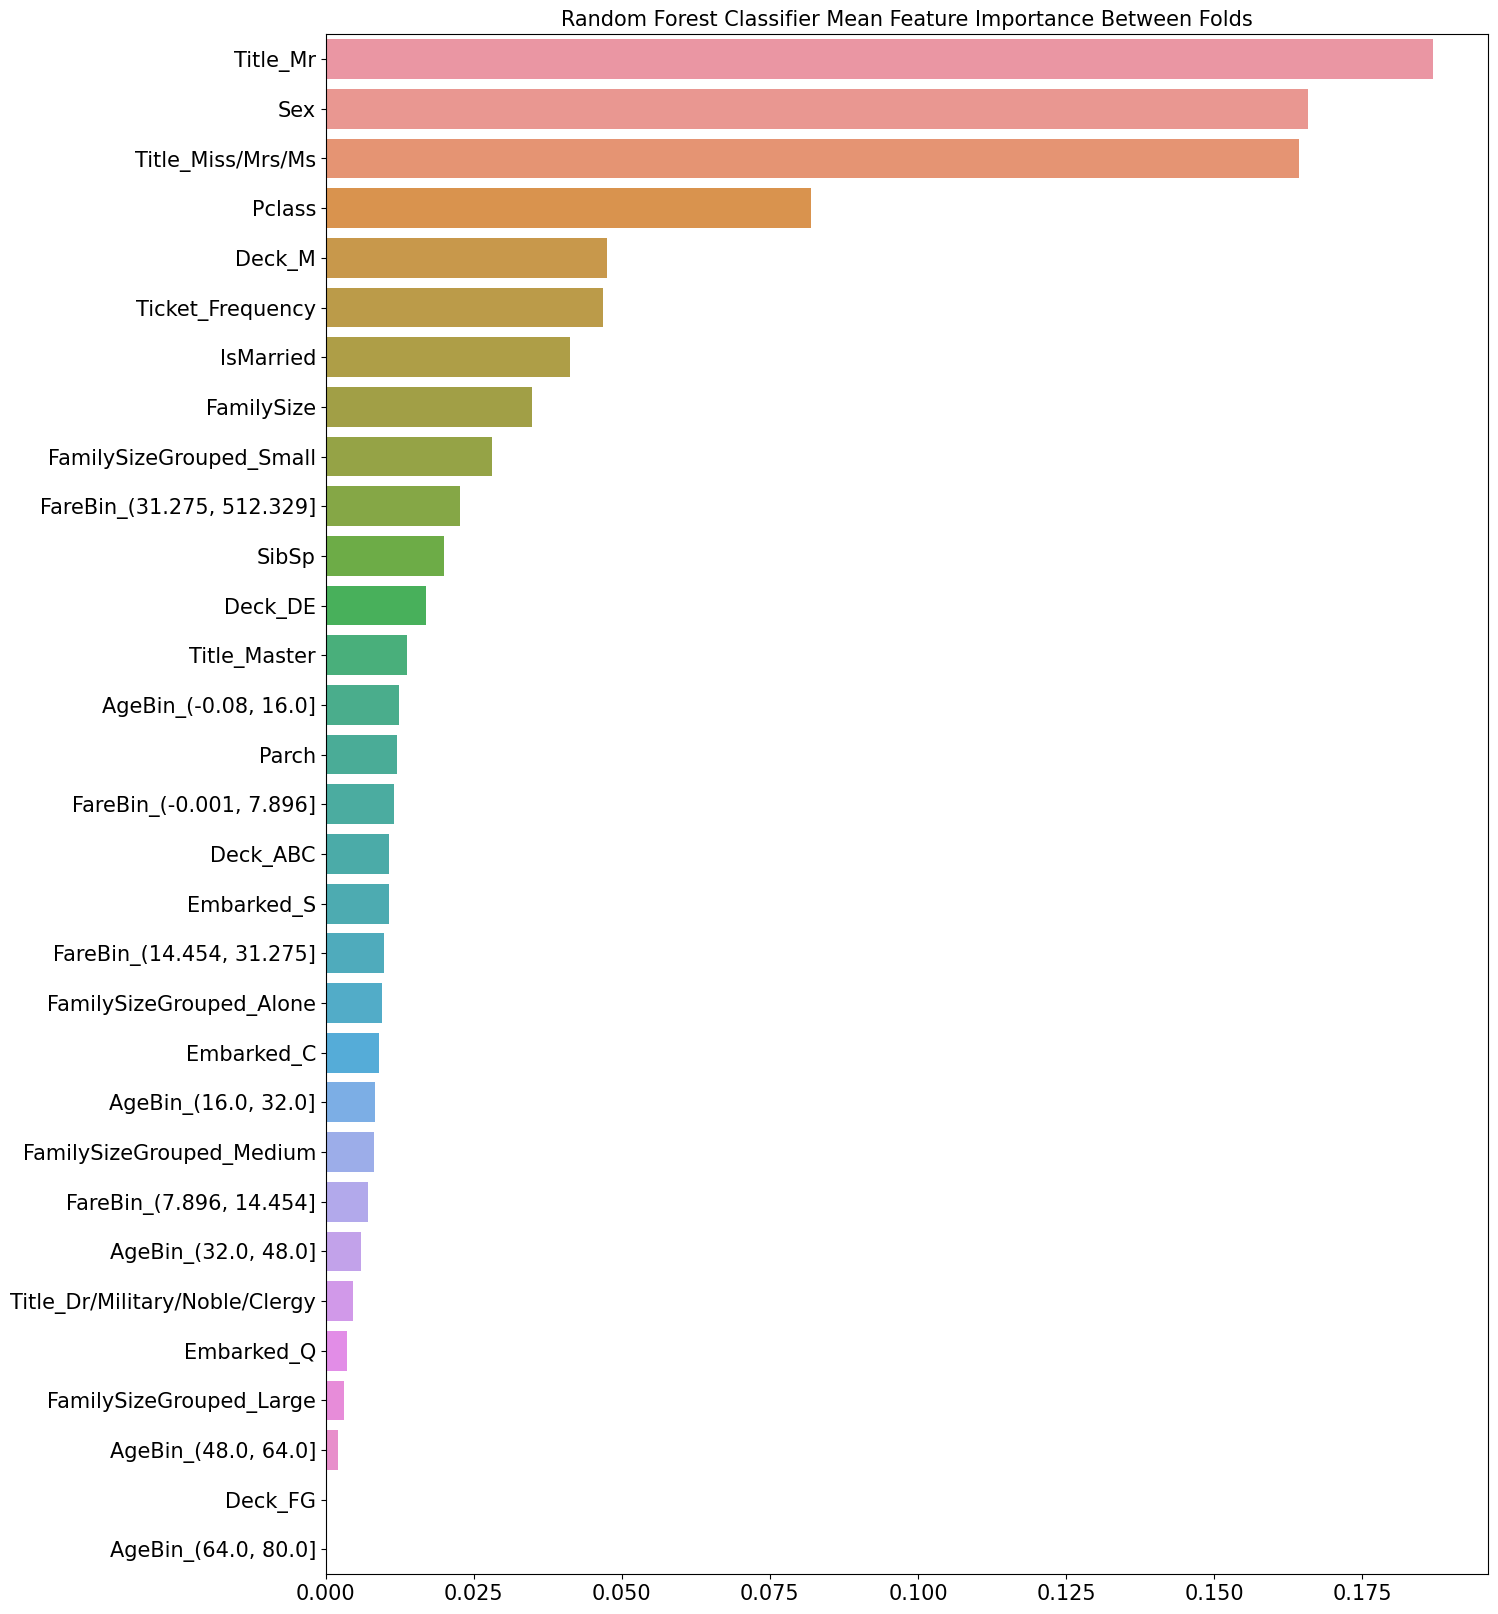

In [60]:
importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 20))
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)

plt.show()

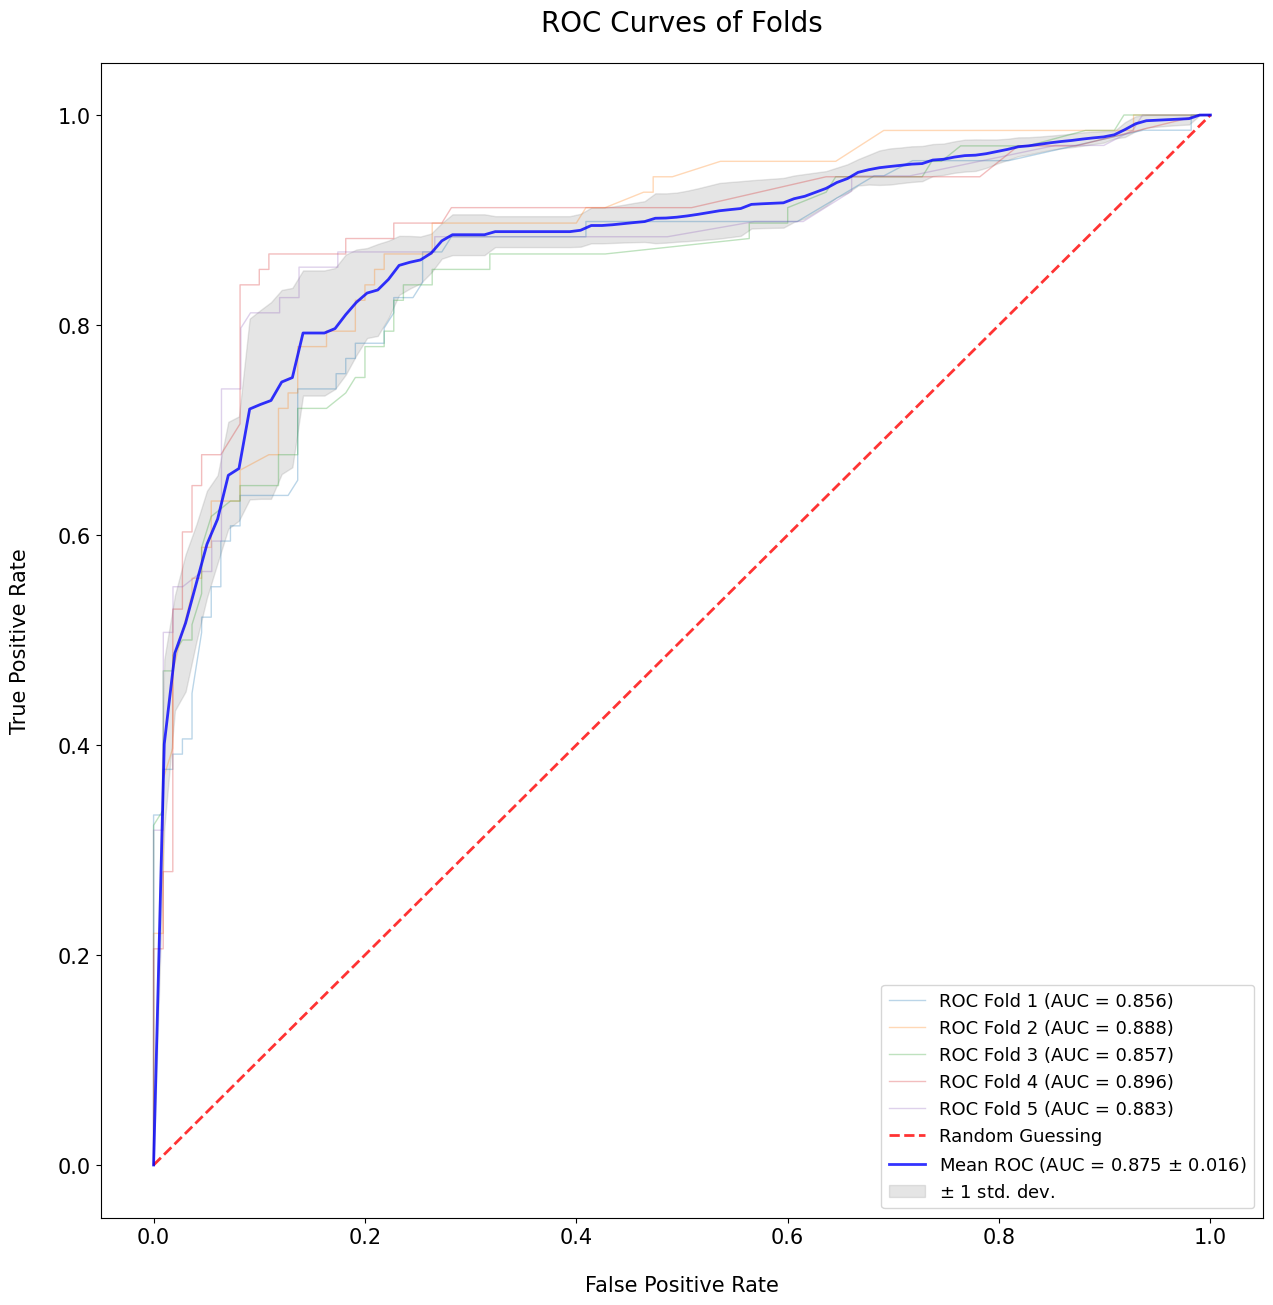

In [61]:
def plot_roc_curve(fprs, tprs):
    
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(15, 15))
    
    # Plotting ROC for each fold and computing AUC scores
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))
        
    # Plotting ROC for random guessing
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random Guessing')
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Plotting the mean ROC
    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc), lw=2, alpha=0.8)
    
    # Plotting the standard deviation around the mean ROC Curve
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='$\pm$ 1 std. dev.')
    
    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=20, y=1.02)
    ax.legend(loc='lower right', prop={'size': 13})
    
    plt.show()

plot_roc_curve(fprs, tprs)

In [62]:
class_survived = [col for col in probs.columns if col.endswith('Prob_1')]
probs['1'] = probs[class_survived].sum(axis=1) / N
probs['0'] = probs.drop(columns=class_survived).sum(axis=1) / N
probs['pred'] = 0
pos = probs[probs['1'] >= 0.5].index
probs.loc[pos, 'pred'] = 1

y_pred = probs['pred'].astype(int)

submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = PassengerID
submission_df['Survived'] = y_pred.values
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(10)

PassengerId  Survived
891          892         0
892          893         1
893          894         0
894          895         0
895          896         1
896          897         0
897          898         1
898          899         0
899          900         1
900          901         0